<a href="https://colab.research.google.com/github/maheshraju00017/AIRBNB_Booking_Analysis/blob/main/Mahesh_Airbnb_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:-** Airbnb Booking Exploratory Data Analysis (EDA)

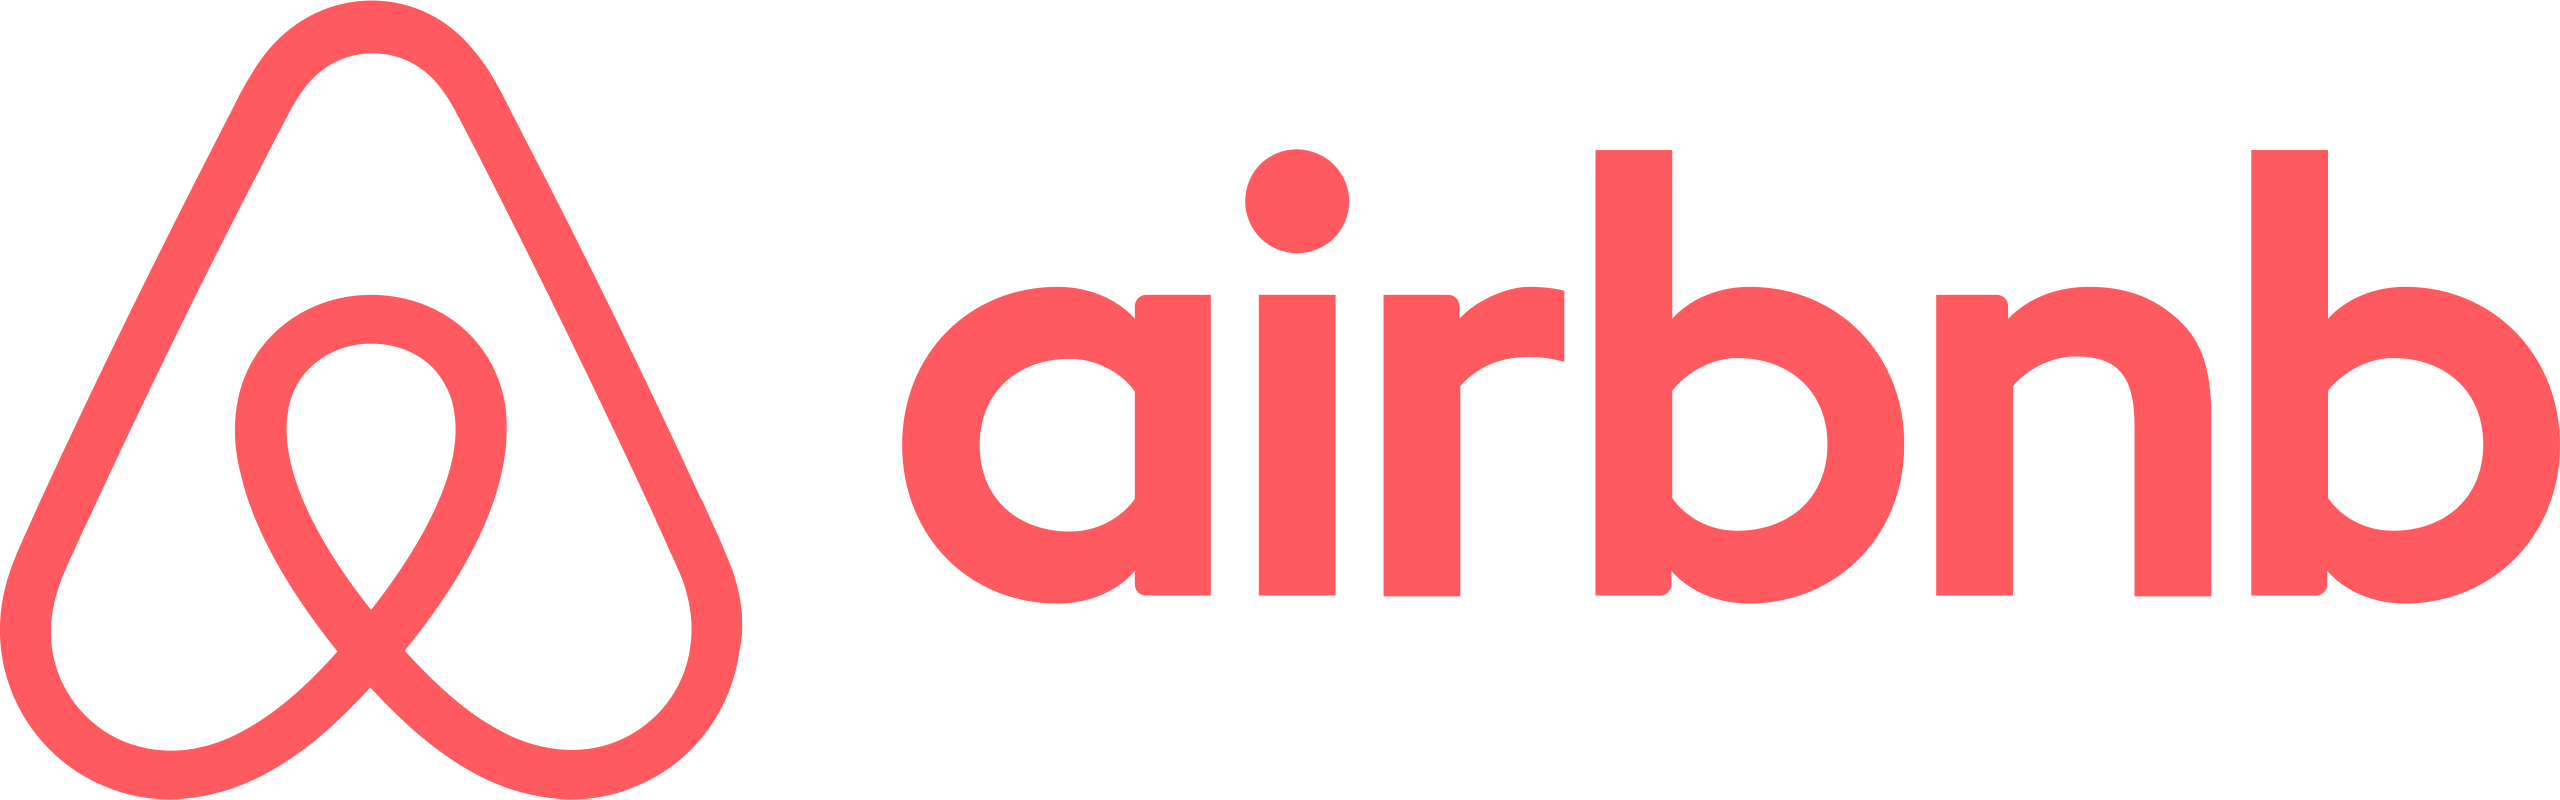

# **Project type:-** EDA

# **Contribution** : Individual

# **Project summary**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today Airbnb became one of a kind service that is used and recognised by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. these millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customer's and provider's (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values which are collected from different listings at New York. Explore and analyse the data to discover key understandings.

#**DATA DESCRIPTION**

id = unique identification number of listing

name = name of listing

host id = unique host id

host name = name of the host

neighbourhood group = location

neighbourhood = area

lattitude = listing lattitude

longitude = listing longitude

room type = type of listing (entire room, private room, shared room)

price = price of listing

minimum nights = the minimum number stay of nights that a guest must require to stay

number_of_reviews = number of reviews, it will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.

last_review = date of the last review

reviews_per_month = insights into frequency of visits of the listing

calculated_host_listings_count = total count of listing on airbnb

availability_365 = an indicator of the total number of days the listing is available for during the year (i.e. if all the available days are rented out, then the listing's occupancy rate is 100%)

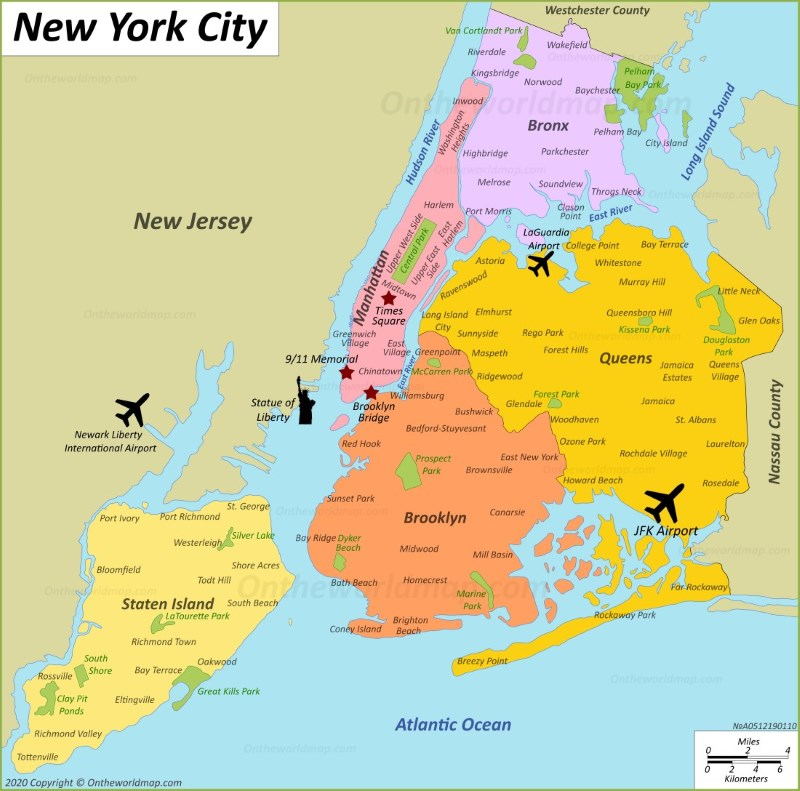

# **Problem statement**

Here, we will be exploring and analysing our data set, trying to find out few insights about the airbnb bookings. Here, we will be finding out the solutions for the following questions from our EDA.


1. In which neighbourhood there are highest listings?
2. Which hosts are the busiest hosts in the region and average highest earning revenues?
3. Which hosts are earning highest revenues with respect to one lisitng and by one visit?
4. Which hosts are having highest price in the data set?
5. What are the hosts having highest frequencies of visit per month and why?
6. Which neighbourhood group is most and least demanded location?
7. What can we learn from the data present in the given data set ? (For ex. number of reviews, price, minimum nights etc)
8. With the help of graphical visulisation, what can we learn about room type, price distributions, availability of rooms over the year and number of night stays?
9. What is the correlation between different variables?
10. By performing bivariate analysis, what can we say about the different categorical data present in the given data set?


# **Business Objective**

There are mainly two objectives in our EDA


1.   Recommending the marketing campaign strategies
2.   To predict where a new guest will book their first travelling destinations

# **Let us begin with our EDA**  

## ***1. Know the Data***

### Mounting the drive

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the required Libraries

In [ ]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon
from wordcloud import WordCloud
sns.set_style("whitegrid",{'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})
%matplotlib inline

### Dataset Loading

In [ ]:
# upload the data using pandas module
working_directory='/content/drive/MyDrive/Airbnb NYC 2019.csv'
airbnb_data_set = pd.read_csv(working_directory)

### Dataset First View

In [ ]:
# reading the first five rows
airbnb_data_set.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
#rows and column count
airbnb_data_set.shape

(48895, 16)

### Dataset Information

In [ ]:
#Data set info
airbnb_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Missing Values/Null Values

In [ ]:
# checking the null value counts
airbnb_data_set.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

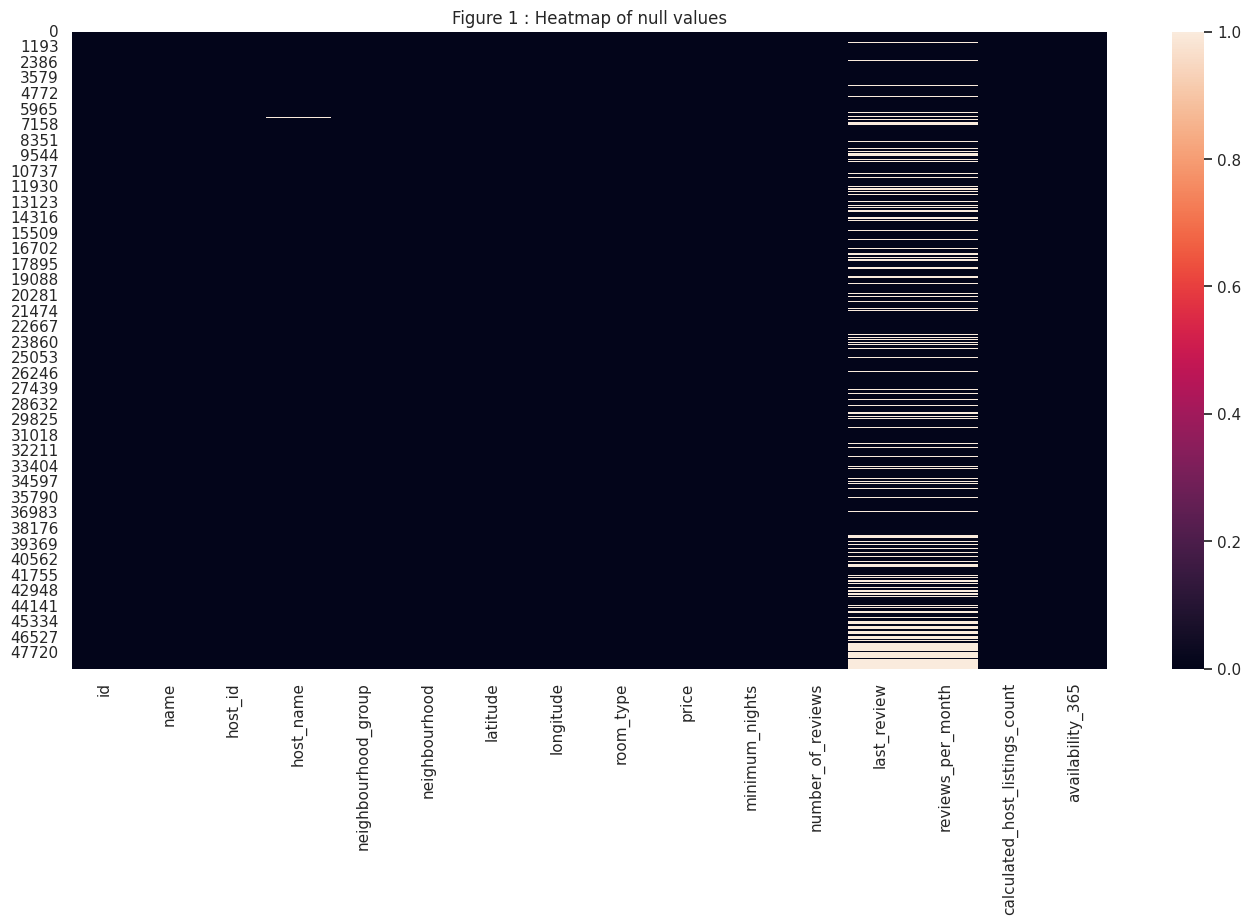

In [ ]:
#heatmap of null values
plt.title("Figure 1 : Heatmap of null values")
sns.heatmap(airbnb_data_set.isnull());

Here, it is convinient for us to use heat map to visulize the locations about the missing values. It shows the information related to density such as population density, air or water pollution density etc. Heat maps works by using shapes and color to indicate a high concentration of data points.   

*In this stage, we came to know few basic informations about the given dataset.*
* *The dataset consists of 48895 rows and 16 columns*
* *The data types of the different attributes includes int, float and object.*
* *By visulising the heat map, we observed that the attributes 'last_review' and 'reviews_per_month' are having highest number of null values whereas 'name' and 'host_name' are having least number of null values.*



## ***2. Data Understanding***

In [ ]:
#Let us have a look on the columns of the given data set
airbnb_data_set.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

These are the list of columns present in the given dataset.

In [ ]:
# Let us describe the given data set
airbnb_data_set.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here, we are describing the data set where we will be getting the information about number of values present in each columns, mean, standard deviations, quartile deviations, minimum and maximum values in the data set.

In [ ]:
# Now let us have a look on the different identification numbers and names used in the given dataset.
print(airbnb_data_set['id'].nunique())
print(airbnb_data_set['name'].nunique())
print(airbnb_data_set['host_id'].nunique())
print(airbnb_data_set['host_name'].nunique())
print(airbnb_data_set['latitude'].nunique())
print(airbnb_data_set['longitude'].nunique())

48895
47905
37457
11452
19048
14718


As we know that in every database, the 'id' attribute is almost unique. So, it is quite important for us to focus on 'id' and 'host_id' attributes. There are unique Id for every listing in the given data set and there are 37457 host id.

*In this stage, we came to know few informations about different attributes present in the dataset and the brief discription about the dataset where we will be getting the information regarding number of values present in each columns, mean, standard deviations, quartile deviations, minimum and maximum values etc in the dataset. Along with this, we also had a look on different identification numbers and names used in the given dataset.*

## 3. ***Data Cleaning***

As we have studied about missing values in the data set and graphical visulisation of them via heat map, it is important for us to remove the attributes with null values. If not, it will be problamatic situation for us to continue with our data analysis.  It is clear from the dataset information and heatmap that most of the missing or null values are in name, host_name, neighbourhood_group, last_review and reviews_per_month. Hence we will be deleting the last_review and name columns as there is no much significance of them for our visualisations.

In [ ]:
# Deleting last_review and name columns.
airbnb_data_set.drop(['last_review','name'],axis=1,inplace=True)
airbnb_data_set

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [ ]:
# Replacing all missing values in reviews per month with 0
airbnb_data_set['reviews_per_month'].fillna(0,inplace=True)
airbnb_data_set

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Note that we have not deleted 'reviews_per_month' column but instead we replaced the null values by 0. This is so because unlike 'last_review', 'name' and 'name', it is numerical data and more over it has a significant role for further data analysis.

In [ ]:
#check if any value is null
airbnb_data_set.isnull().sum()

id                                 0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

There are 21 missing host names. Since the number is comparitively less and it does not make much impact on our visualisations, we can just ignore the missing host names.

In [ ]:
# Ignoring the missing host names.
airbnb_data_set=airbnb_data_set[~airbnb_data_set['host_name'].isnull()]
airbnb_data_set

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Thus, we have removed all the null values present in the data set and hence done with data cleaning.

*In this stage, we have achieved the following:*
*   *Deleted 'last_review' and 'name' attributes from the dataset as it was having least significance in our EDA.*
*   *Replacing all missing values in reviews per month with 0 though it had higher number of null values as the significance of this attribute is quite important in our EDA.*
*    *Ignored the missing host names as they were less in number and their significance for EDA does'nt matter as such.*




## 4. ***Data Wrangling***

It is important for us to get the information about the revenues of each hosts so that we can analyse the data set in detail. This can be done by creating a new column called as "revenues" whose values are given by the product of price of each room for the minimun number of nights.  

In [ ]:
# estimated revenues
airbnb_data_set['revenues'] = airbnb_data_set['price']*airbnb_data_set['minimum_nights']
airbnb_data_set

<ipython-input-34-d6c2f1d31754>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data_set['revenues'] = airbnb_data_set['price']*airbnb_data_set['minimum_nights']


,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,450
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,140
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,160
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,1150
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,55


Thus, we have created a new attribute named 'revenues' in our data set.

In [ ]:
#rows and column count after estimating the revenues
airbnb_data_set.shape

(48874, 15)

In [ ]:
#Data set info
airbnb_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   host_id                         48874 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48874 non-null  object 
 4   neighbourhood                   48874 non-null  object 
 5   latitude                        48874 non-null  float64
 6   longitude                       48874 non-null  float64
 7   room_type                       48874 non-null  object 
 8   price                           48874 non-null  int64  
 9   minimum_nights                  48874 non-null  int64  
 10  number_of_reviews               48874 non-null  int64  
 11  reviews_per_month               48874 non-null  float64
 12  calculated_host_listings_count  

Here, we can get the information about the different data types of the columns.

In [ ]:
# describe numerical data
airbnb_data_set.describe().astype(int)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
count,48874,48874,48874,48874,48874,48874,48874,48874,48874,48874,48874
mean,19019875,67621569,40,-73,152,7,23,1,7,112,1284
std,10983179,78614153,0,0,240,20,44,1,32,131,11807
min,2539,2438,40,-74,0,1,0,0,1,0,0
25%,9474068,7823257,40,-73,69,1,1,0,1,0,135
50%,19679355,30792573,40,-73,106,3,5,0,1,45,300
75%,29153423,107434423,40,-73,175,5,24,1,2,227,735
max,36487245,274321313,40,-73,10000,1250,629,58,327,365,1170000


Here, we can make the following observations:


*   The columns with labels as **minimum_nights, number_of_reviews,
reviews_per_month, calculated_host_listing_count** and **availability_365** are the numerical data.
*   The *minimum price* of the listing is 0, *maximum price* of the listing is 10,000 and average price per listing is 152.
*   People stay in the listings at least for a night and atmost 1250 nights which makes an average of 7 nights.
*   The average number of reviews in the given dataset is 23 and highest is 629.
*   The average host listing count in the given dataset is 7 and highest is 327.
*   The average availability of rooms over the year is 112.

In [ ]:
# describe categorical data
airbnb_data_set.describe(include='O')

,host_name,neighbourhood_group,neighbourhood,room_type
count,48874,48874,48874,48874
unique,11452,5,221,3
top,Michael,Manhattan,Williamsburg,Entire home/apt
freq,417,21652,3919,25400


From this describe table we can conclude that **host_name, neighbourhood_group, neighbourhood** and **room_type** are categorical variable. The highest listing is in Manhattan neighbourhood group and Williamsburg neighbourhood which is an entire home or an apartment.

*In this stage, we have achieved the following:*


*   *Created a new attribute named 'revenues' whose values are given by the product of price of each room for the minimun number of nights.*
*   *Got the brief information about the different data types of the attributes*
*   Described the numerical and categorical data present in the dataset.

*Now we are all set to do data visualization.*




## ***5. Data Visualization***

In [ ]:
# Let us have a brief look on the number of unique elements in the data set.
airbnb_data_set.nunique()

id                                48874
host_id                           37439
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19042
longitude                         14717
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
revenues                           2125
dtype: int64

Here, we are able to figure out the unique number of elements present in attributes of the given dataset. Now, we shall continue with EDA

### ***Univariate Analysis***

Univariate analysis is the analysis of attributes or characteristics of one variable. The univariate analysis describes the data's range and measures of central tendencies. If the data or observation involve one characteristic or attribute of a random variable then it is called a univariate. The univariate analysis describes the data's range and measures of central tendencies.
Here, we will be studying about few important attributes.

### **'host-id' and 'host_name' attributes**

In [ ]:
# Let us have a look on host_id attribute
airbnb_data_set.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48874, dtype: int64

In [ ]:
#geting the number of unique id from the host_id attribute
airbnb_data_set.host_id.nunique()

37439

In [ ]:
# Let us have a look on host_id attribute
airbnb_data_set.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48874, dtype: object

In [ ]:
#geting the number of unique names from the host_name attribute
airbnb_data_set.host_name.nunique()

11452

Observations:
*   There are total of 48874 host id numbers in which 37439 numbers are unique.
*   There are total of 48874 host names in which 11452 names are unique.
*   From this it can be concluded that there are many hosts with the same name.
*   So we will use host id for all further analysis.



### **'neighbourhood_group' attribute**

In [ ]:
# Let us have a look on neighbourhood_group attribute
airbnb_data_set.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48874, dtype: object

In [ ]:
#geting the number of unique names from the neighbourhood_group attribute
airbnb_data_set.neighbourhood_group.nunique()

5

In [ ]:
# Since the number of neighbourhood_group values are less in number, let us have a look on those values.
airbnb_data_set.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

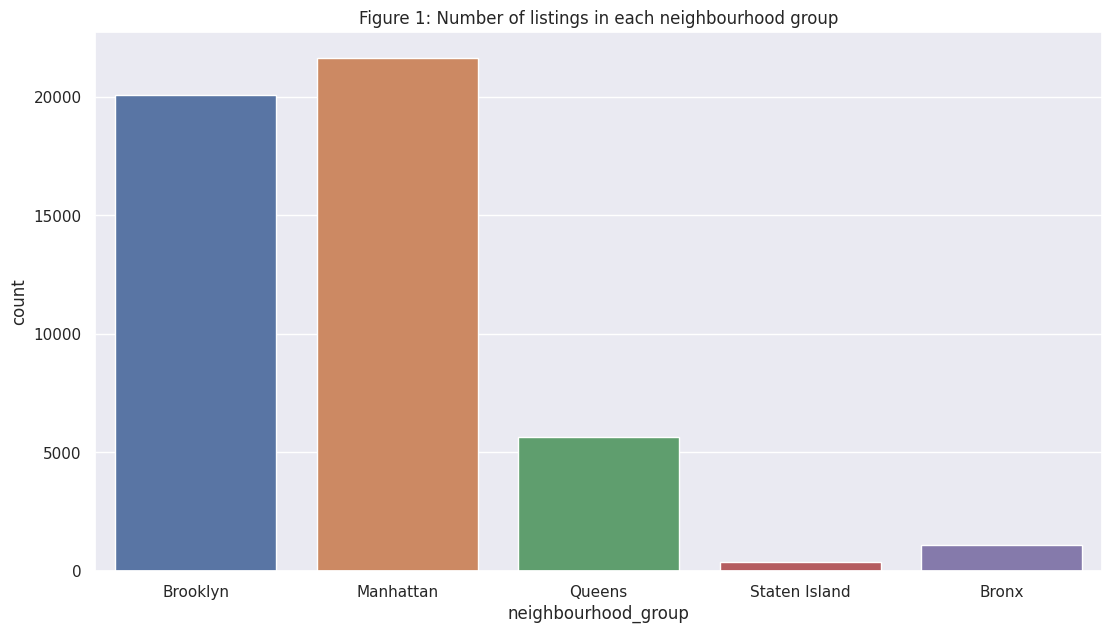

In [ ]:
# Visualising the neighbourhood_group attribute with the help of countplot.
plt.figure(figsize=(13,7))
plt.title("Figure 1: Number of listings in each neighbourhood group")
sns.countplot(x=airbnb_data_set['neighbourhood_group'])
plt.show();

The purpose of choosing countplot here is to show the counts of observations in 'neighbourhood_group' using bars. This method is accepting the 'neighbourhood_group' as x parameter and number of count as y parameter.  

Observations:
*   There are total of 48874 neighbourhood groups numbers in which only 5 neighbourhood groups are unique. They are namely 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'.
*   By visualising the neighbourhood_group attribute with the help of countplot, we can conclude the following.
      * The highest number of listings are in manhattan neighbourhood group with more than 20000 count of listings.
      * The least number of listings are in Staten island neighbourhood group less than 1000 count of listings.

### **'neighbourhood' attribute**

In [ ]:
# Let us have a look on neighbourhood attribute
airbnb_data_set.neighbourhood

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48874, dtype: object

In [ ]:
#geting the number of unique names from the neighbourhood attribute
airbnb_data_set.neighbourhood.nunique()

221

In [ ]:
#storing all the diffrent neighbourhood groups to diffrent data frames
brooklyn_group_df=airbnb_data_set.loc[airbnb_data_set['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=airbnb_data_set.loc[airbnb_data_set['neighbourhood_group']== 'Manhattan']
Queens_group_df=airbnb_data_set.loc[airbnb_data_set['neighbourhood_group']== 'Queens']
Staten_Island_group_df=airbnb_data_set.loc[airbnb_data_set['neighbourhood_group']== 'Staten Island']
Bronx_group_df=airbnb_data_set.loc[airbnb_data_set['neighbourhood_group']== 'Bronx']

Text(0.5, 0, 'Neighbourhood')

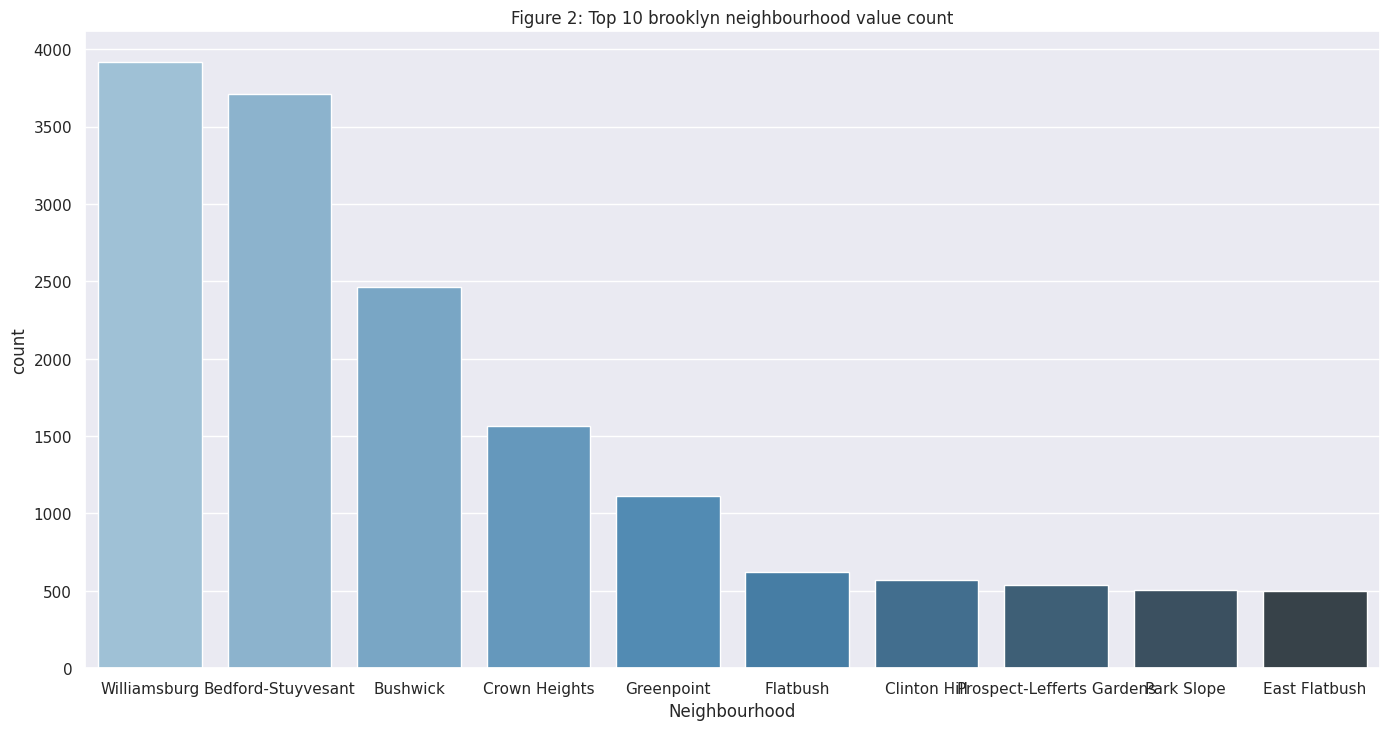

In [ ]:
# top 10 areas in brooklyn with most booking
#creating a count plot
sns.countplot(x="neighbourhood", data=brooklyn_group_df, palette="Blues_d", order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Figure 2: Top 10 brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

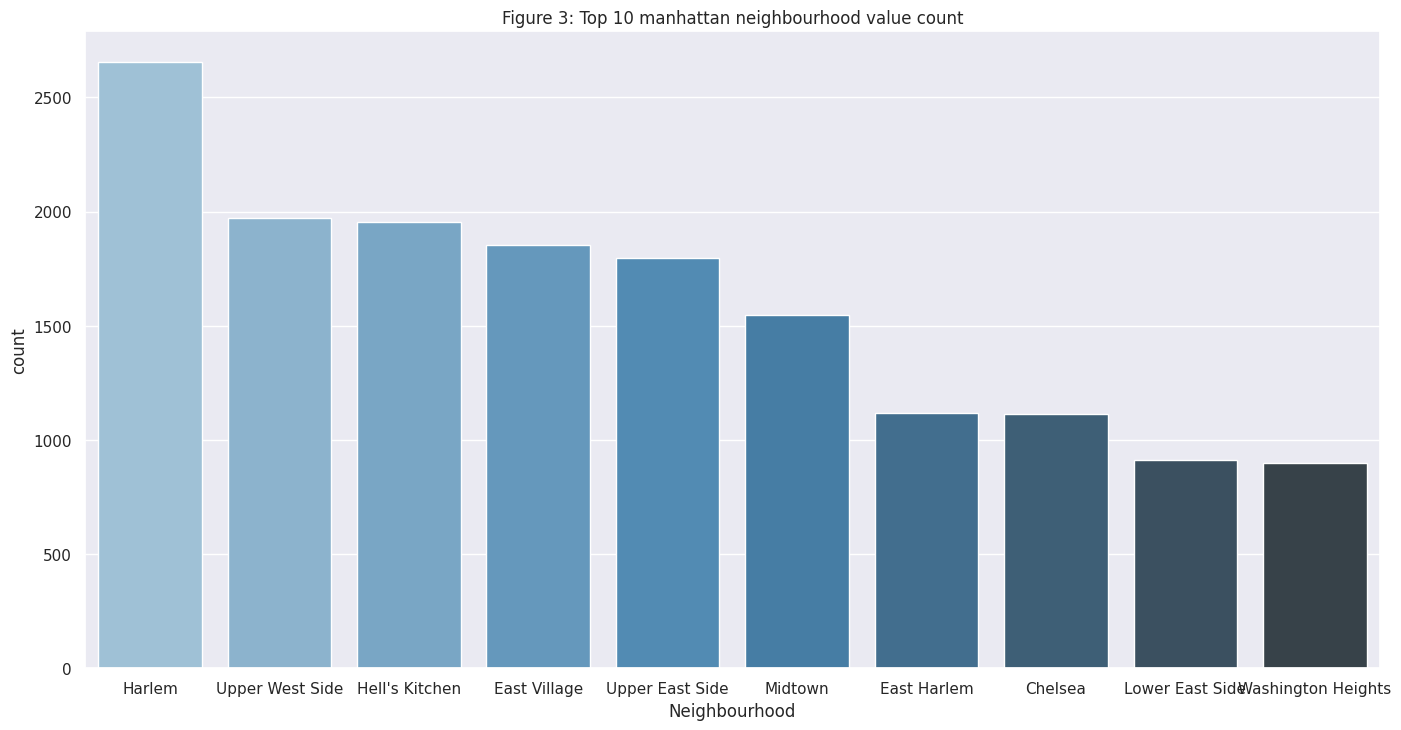

In [ ]:
# top 10 areas in manhattan with most booking
#creating a count plot
sns.countplot(x="neighbourhood", data=manhattan_group_df, palette="Blues_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Figure 3: Top 10 manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

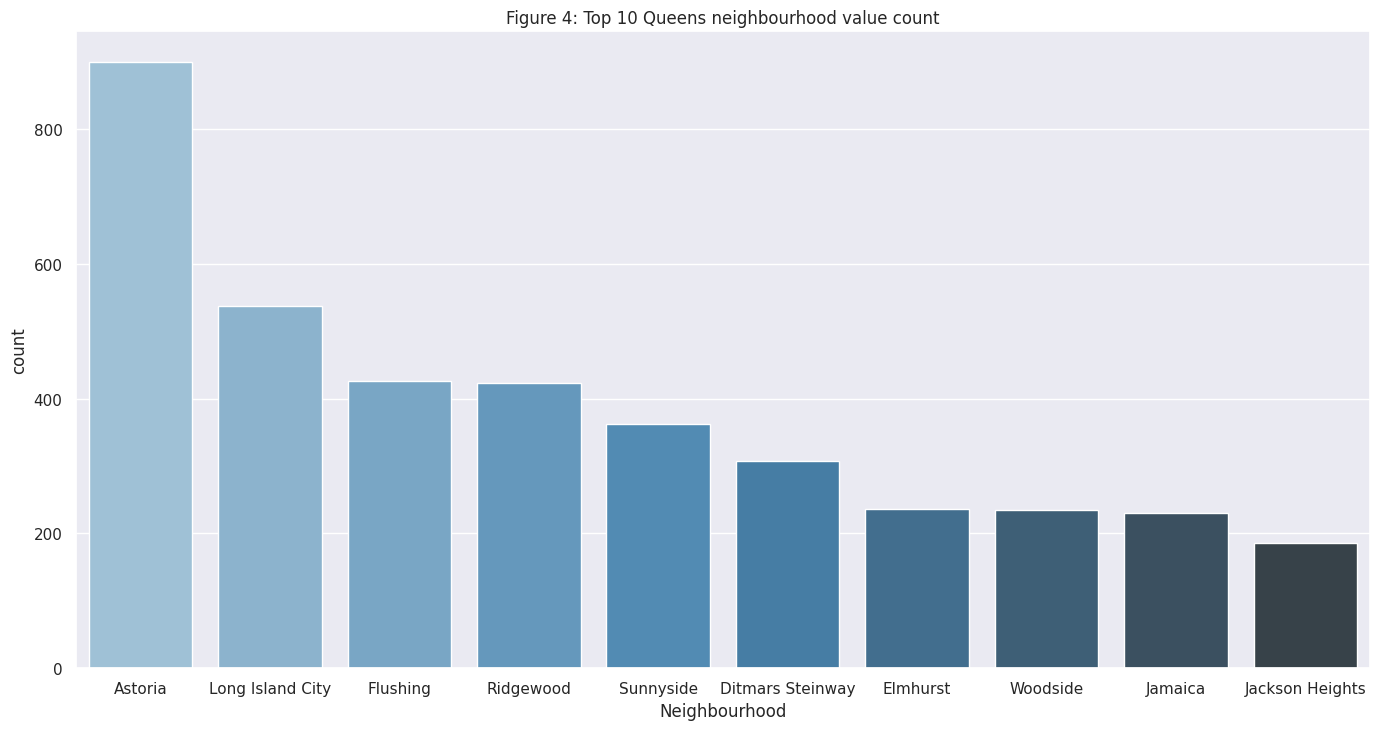

In [ ]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(x="neighbourhood", data=Queens_group_df, palette="Blues_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Figure 4: Top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

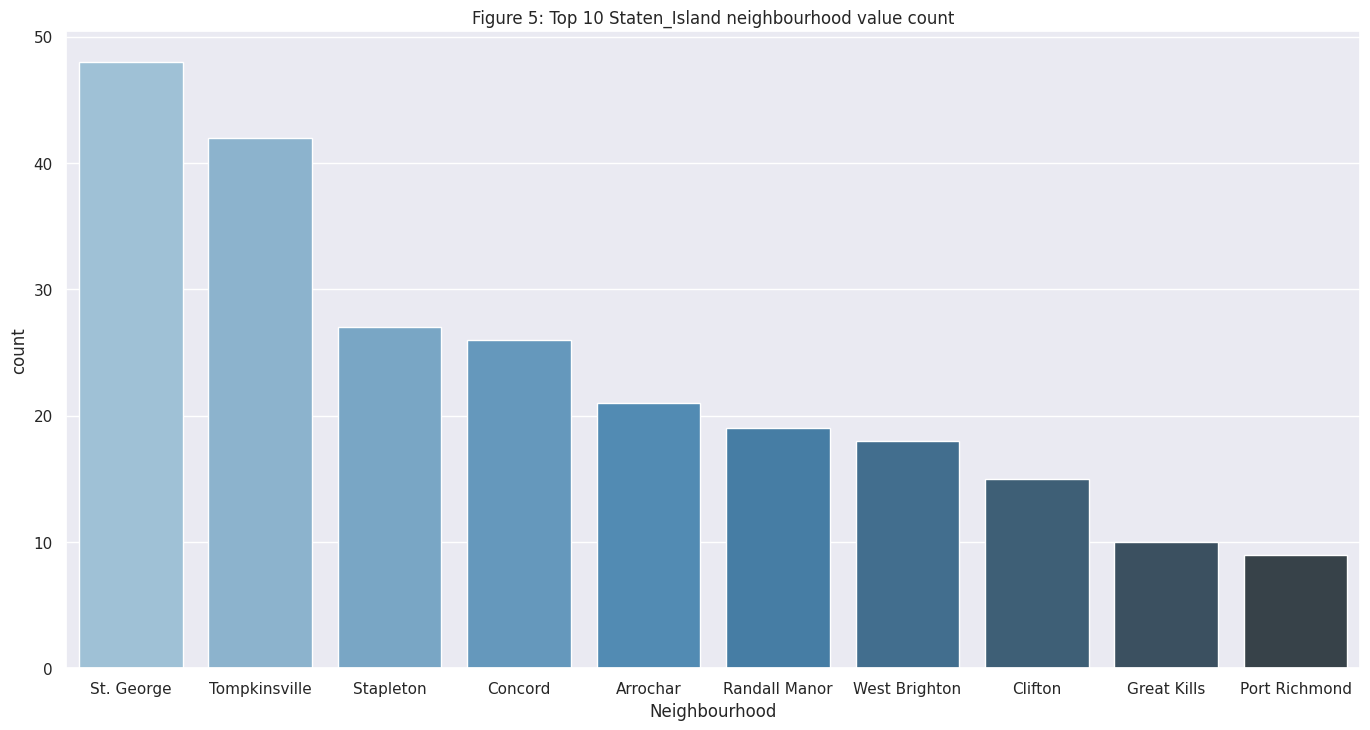

In [ ]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(x="neighbourhood", data=Staten_Island_group_df, palette="Blues_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Figure 5: Top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

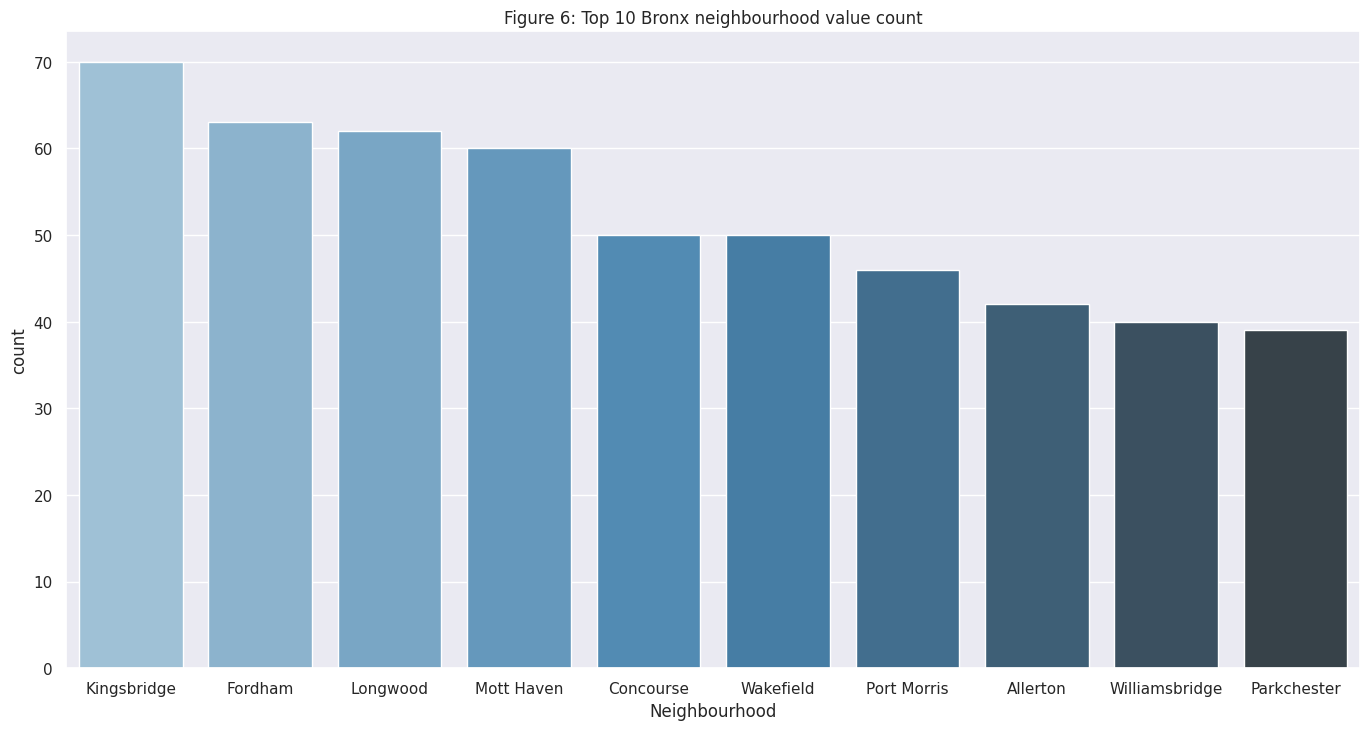

In [ ]:
# top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(x="neighbourhood", data=Bronx_group_df, palette="Blues_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Figure 6: Top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('Neighbourhood')

The purpose of choosing countplot here is to show the counts of top 10 areas in each neighbourhoog groups.  observations in 'negihbourhood' using bars. This method is accepting the 'neighbourhood_group' as x parameter and number of count as y parameter.

In [ ]:
# count of neighbourhood
airbnb_A = airbnb_data_set.groupby(['neighbourhood_group','neighbourhood']).agg({'id':'count','price':'mean','number_of_reviews':'sum','reviews_per_month':'sum'}).sort_values(by='id',ascending=False)
airbnb_A.head(10)

id       price  number_of_reviews  \
neighbourhood_group neighbourhood                                             
Brooklyn            Williamsburg        3919  143.802501              85427   
                    Bedford-Stuyvesant  3714  107.678244             110352   
Manhattan           Harlem              2656  119.020708              75927   
Brooklyn            Bushwick            2464   84.819805              52513   
Manhattan           Upper West Side     1970  210.934010              36058   
                    Hell's Kitchen      1955  204.924297              49941   
                    East Village        1853  186.083108              44670   
                    Upper East Side     1797  188.872565              31686   
Brooklyn            Crown Heights       1563  112.520154              36408   
Manhattan           Midtown             1545  282.719094              19444   

                                        reviews_per_month  
neighbourhood_group neighbourhood                          
Brooklyn            Williamsburg                  3475.77  
                    Bedford-Stuyvesant            4874.52  
Manhattan           Harlem                        2955.21  
Brooklyn            Bushwick                      2632.49  
Manhattan           Upper West Side               1487.27  
                    Hell's Kitchen                2802.73  
                    East Village                  1668.40  
                    Upper East Side               1523.66  
Brooklyn            Crown Heights                 1560.82  
Manhattan           Midtown                       1264.09

In [ ]:
# sorting of neighbourhood in descending order by number of reviews
airbnb_A.sort_values(by='number_of_reviews',ascending=False).head(10)

id       price  number_of_reviews  \
neighbourhood_group neighbourhood                                             
Brooklyn            Bedford-Stuyvesant  3714  107.678244             110352   
                    Williamsburg        3919  143.802501              85427   
Manhattan           Harlem              2656  119.020708              75927   
Brooklyn            Bushwick            2464   84.819805              52513   
Manhattan           Hell's Kitchen      1955  204.924297              49941   
                    East Village        1853  186.083108              44670   
                    East Harlem         1116  133.193548              36440   
Brooklyn            Crown Heights       1563  112.520154              36408   
Manhattan           Upper West Side     1970  210.934010              36058   
                    Upper East Side     1797  188.872565              31686   

                                        reviews_per_month  
neighbourhood_group neighbourhood                          
Brooklyn            Bedford-Stuyvesant            4874.52  
                    Williamsburg                  3475.77  
Manhattan           Harlem                        2955.21  
Brooklyn            Bushwick                      2632.49  
Manhattan           Hell's Kitchen                2802.73  
                    East Village                  1668.40  
                    East Harlem                   1578.60  
Brooklyn            Crown Heights                 1560.82  
Manhattan           Upper West Side               1487.27  
                    Upper East Side               1523.66

In [ ]:
# sorting of neighbourhood in ascending order by number of reviews
airbnb_A.sort_values(by='number_of_reviews',ascending=True).head(10)

id       price  \
neighbourhood_group neighbourhood                                
Staten Island       Woodrow                      1  700.000000   
                    Fort Wadsworth               1  800.000000   
                    New Dorp                     1   57.000000   
                    Bay Terrace, Staten Island   2  102.500000   
Queens              Breezy Point                 3  213.333333   
Bronx               West Farms                   2  122.000000   
Staten Island       Oakwood                      5   81.200000   
                    Willowbrook                  1  249.000000   
Brooklyn            Sea Gate                     7  487.857143   
Queens              Holliswood                   4  135.750000   

                                                number_of_reviews  \
neighbourhood_group neighbourhood                                   
Staten Island       Woodrow                                     0   
                    Fort Wadsworth                              0   
                    New Dorp                                    0   
                    Bay Terrace, Staten Island                  3   
Queens              Breezy Point                                5   
Bronx               West Farms                                  7   
Staten Island       Oakwood                                     9   
                    Willowbrook                                 9   
Brooklyn            Sea Gate                                   10   
Queens              Holliswood                                 15   

                                                reviews_per_month  
neighbourhood_group neighbourhood                                  
Staten Island       Woodrow                                  0.00  
                    Fort Wadsworth                           0.00  
                    New Dorp                                 0.00  
                    Bay Terrace, Staten Island               0.91  
Queens              Breezy Point                             0.44  
Bronx               West Farms                               0.79  
Staten Island       Oakwood                                  3.57  
                    Willowbrook                              0.80  
Brooklyn            Sea Gate                                 1.32  
Queens              Holliswood                               0.83

Observations
* Willamsburg, Bedford and Bushwick has most no of bookings in brooklyn neighbourhood_group
* Harlem, Upper West Side and Hell's Kitchen has most no of bookings in manhattan neighbourhood_group
* Astoria, Flushing and Long island city has most no of bookings in Queens neighbourhood_group
* Tompkinsville, St.George, Cancaord has most no of bookings in Staten_Island neighbourhood_group
* In bronx neighbourhood group, almost all the neighbourhoods have almost equal no of bookings
* By having a look on count of neighbourhood, we have observed the following:
    *   The highest listing is in Williamsburg neighbourhood with Brooklyn as its neighbourhood group.  
    *   The second highest listing is also in Brooklyn neighbourhood group with Bedford-Stuyvesant as its neighbourhood.
    *   In general, we can conclude that top 10 highest listings are in Manhattan and Brooklyn neighbourhood group.
*  One can clearly observe that highest number of reviews is of Bedford-Stuyvesant neighbourhood, and then Williamsburg, Harlem, Bushwick, etc.
*  We can also observe that lowest number of reviews is of Staten Island followed by Queens, Brooklyn etc.

### **'longitude' and 'lattitude' attribute**

We observe that this is a numerical data, there is no point in checking the look or checking for the unique number of values present in this attributes. So instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on neighbourhood attribute
airbnb_data_set.latitude.describe()

count    48874.000000
mean        40.728946
std          0.054529
min         40.499790
25%         40.690100
50%         40.723065
75%         40.763110
max         40.913060
Name: latitude, dtype: float64

In [ ]:
airbnb_data_set.longitude.describe()

count    48874.000000
mean       -73.952172
std          0.046156
min        -74.244420
25%        -73.983078
50%        -73.955680
75%        -73.936273
max        -73.712990
Name: longitude, dtype: float64

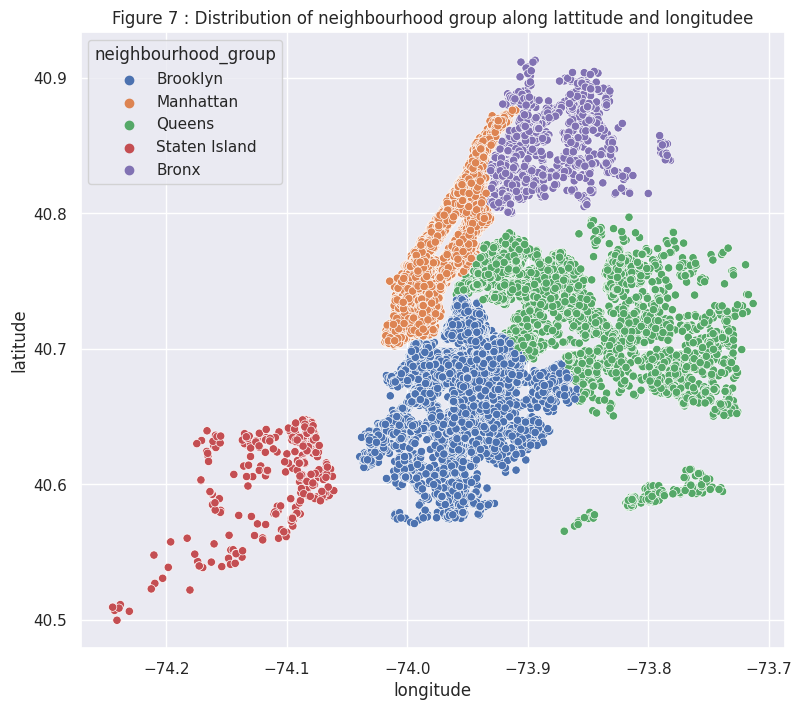

In [ ]:
# distribution of neighbourhood group along lattitude and longitude
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Figure 7 : Distribution of neighbourhood group along lattitude and longitudee")
sns.scatterplot(data=airbnb_data_set['neighbourhood_group'],x=airbnb_data_set['longitude'],y=airbnb_data_set['latitude'],hue=airbnb_data_set['neighbourhood_group']);

Here, we are using scatter plot to visualise the distribution of neighbourhood group accross the New York region. The x paramter is 'longitude' and y parameter is 'latitude' with the hue as 'neighbourhood_group'.

Observations:


Here the wide distribution of listings are in **Queens neighbourhood group** which lies between lattitude range of 40.8 to 40.55 and longitude range of -74.0 to -73.7 followed by **Brooklyn neighbourhood group** which lies between lattitude range of 40.56 to 40.72 and lattitude range of -74.05 to -73.98. The least distribution of listings are in **Staten island** whose latitude lies from 40.5 to 40.65 and longitude lies from -74.2 to -74.1

### **'room_type' attribute**

In [ ]:
# Let us have a look on neighbourhood attribute
airbnb_data_set.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48874, dtype: object

In [ ]:
#geting the number of unique names from the neighbourhood attribute
airbnb_data_set.room_type.nunique()

3

In [ ]:
#geting the number of unique names from the neighbourhood attribute
airbnb_data_set.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 0, 'Type of rooms')

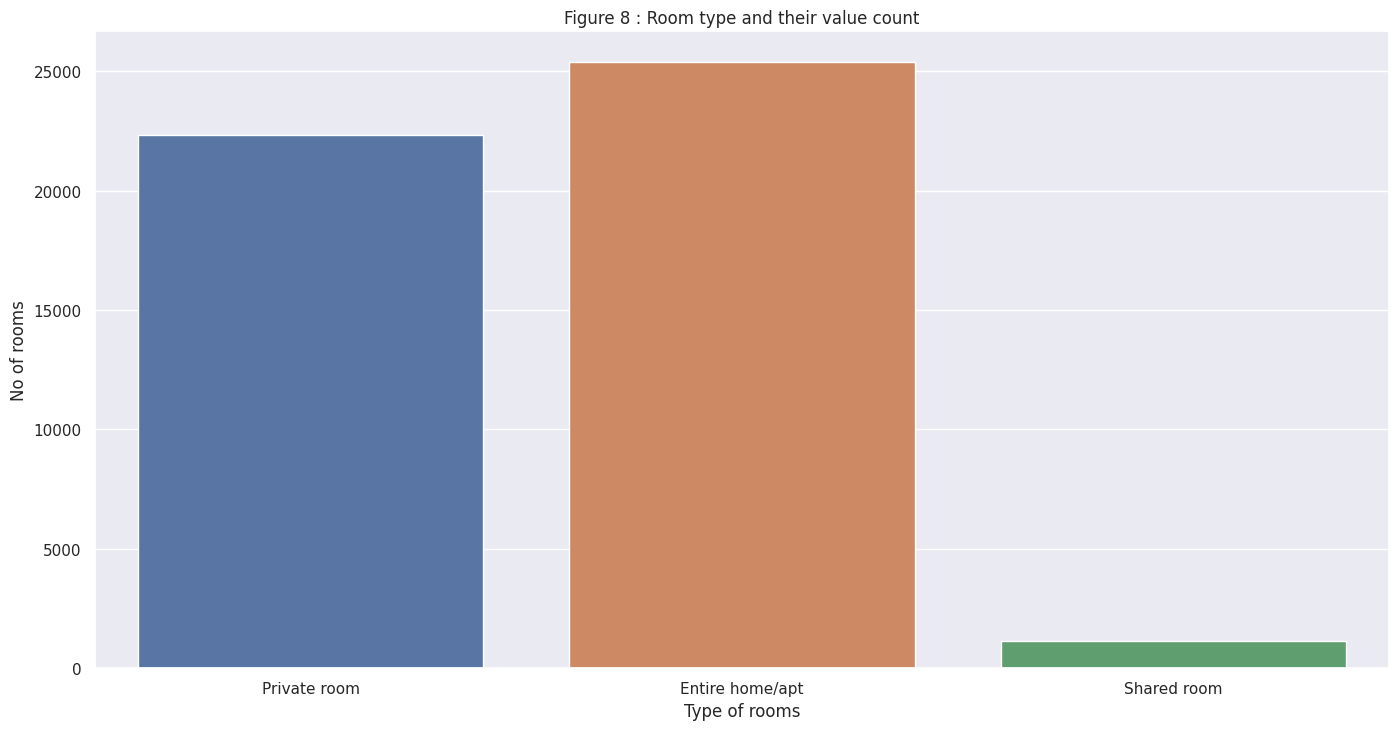

In [ ]:
#creating a count plot
sns.countplot(x=airbnb_data_set['room_type']).set_title('Figure 8 : Room type and their value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Type of rooms')

The purpose of choosing countplot here is to visualise which type of listings does the customer prefers the most. This method is accepting the 'room_type'as x parameter and number of rooms as y parameter.

Observations

*   There are 48874 values in this attribute in which there are three unique values namely private room, Entire home/apt, and shared rooms.
*  Customers prefer entire home or apartment type of rooms and private rooms rather than shared rooms whose counts are very less comparitively.
*   So, we can suggest the hosts to focus more on entire homes, apartments and private rooms rather than shared rooms.



### **'price' attribute**

We observe that this attribute consists of numerical data. So, there is no point in checking the look or checking for the unique number of values present in this attributes. Instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on price attribute
airbnb_data_set.price.describe()

count    48874.000000
mean       152.738634
std        240.199728
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0, 0.5, 'No of rooms')

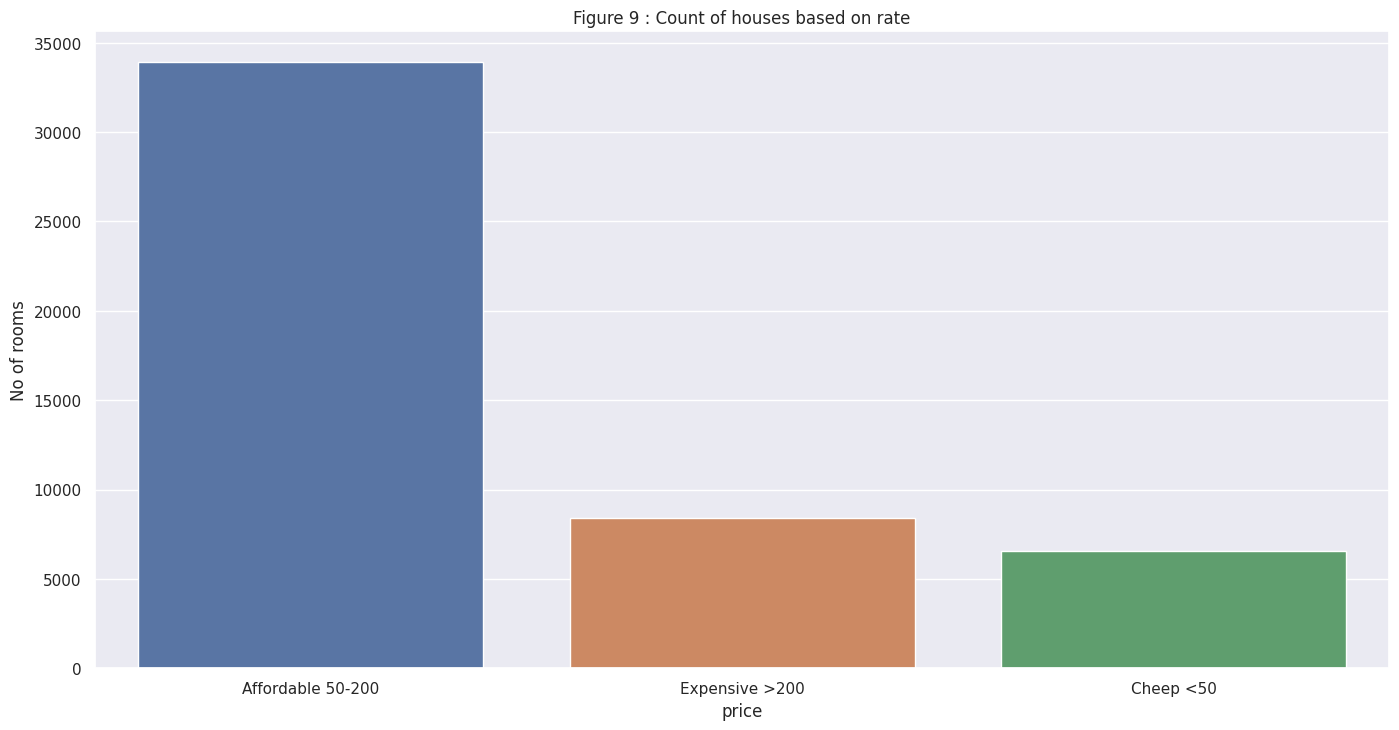

In [ ]:
'''
dividing price range in 3 groups
1) cheap i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot
sns.countplot(x=airbnb_data_set.price.apply(price_catagory)).set_title('Figure 9 : Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms')

The purpose of choosing countplot here is to visualise the different price ranges for the rooms. For that, we define a new fuction named as price_catagory which returns different values for different price ranges. This chart is accepting the 'price_catagory' function as x parameter and number of rooms as y parameter.

Observations

* People prefer the rooms in range of 50 to 200
* People choosing the listings of price less than 50 are less.




### **'minimum_nights' attribute**

We observe that this attribute consists of numerical data. So, there is no point in checking the look or checking for the unique number of values present in this attributes. Instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on minimum_nights attribute
airbnb_data_set.minimum_nights.describe()

count    48874.000000
mean         7.031387
std         20.514423
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

<ipython-input-69-b89c8fdf554c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_data_set["minimum_nights"]).set_title('Figure 10 : Minimum nights density plot')


Text(0.5, 1.0, 'Figure 10 : Minimum nights density plot')

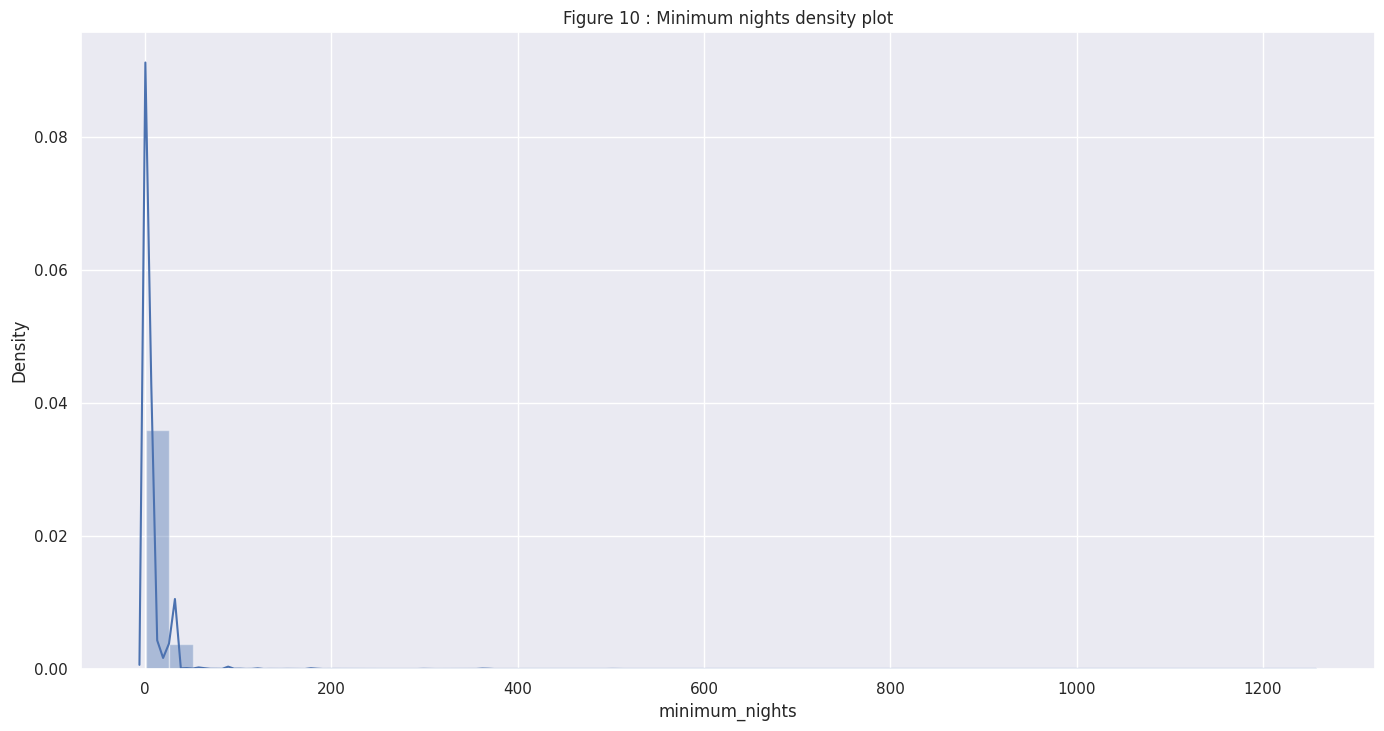

In [ ]:
# Creating a distplot
sns.distplot(airbnb_data_set["minimum_nights"]).set_title('Figure 10 : Minimum nights density plot')

<ipython-input-70-9276ba84ea72>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(min_nights.minimum_nights).set_title('Figure 11 : Minimum nights density plot after removeing outliers')


Text(0.5, 1.0, 'Figure 11 : Minimum nights density plot after removeing outliers')

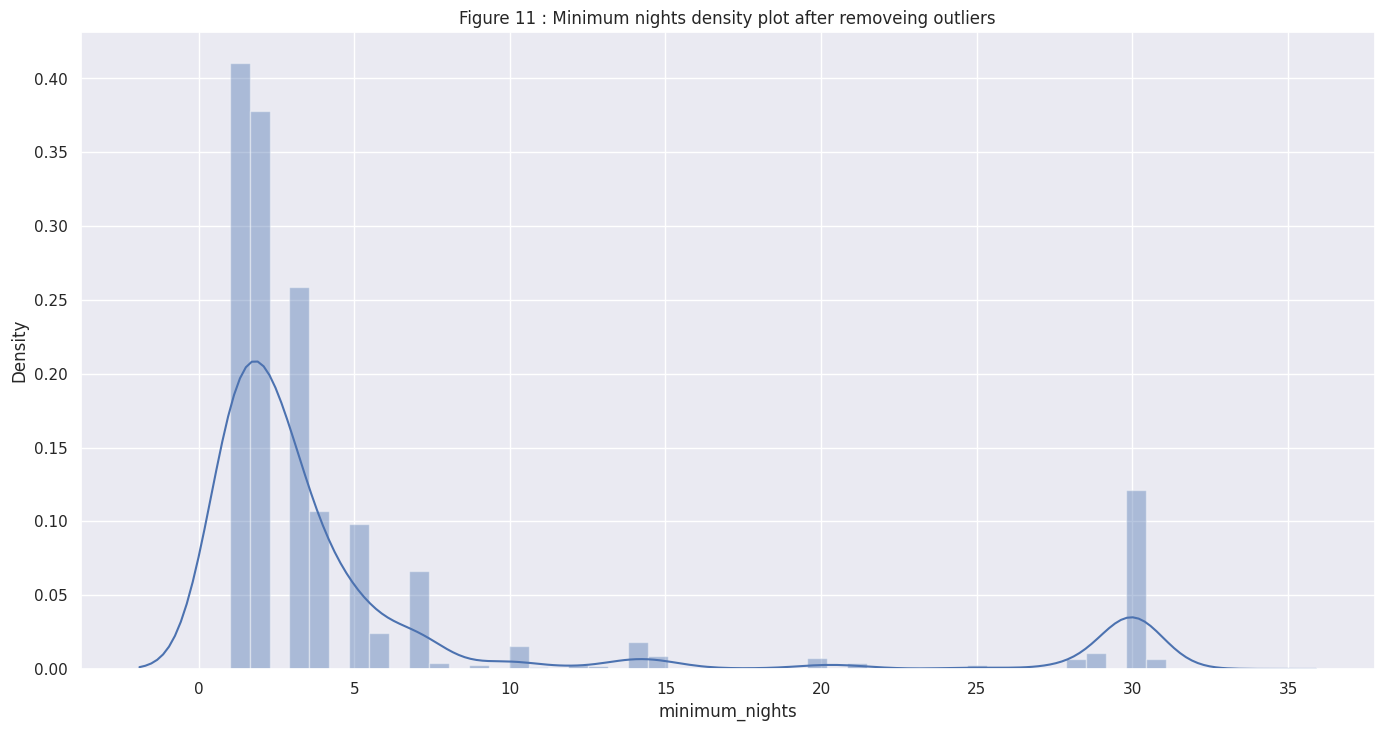

In [ ]:
# subsetting the database with values of min night under 35 to overcome outliners.
min_nights=airbnb_data_set[airbnb_data_set.minimum_nights<35]
#creating a distplot
sns.distplot(min_nights.minimum_nights).set_title('Figure 11 : Minimum nights density plot after removeing outliers')

The purpose of choosing distplot here is to visualise the density of maximun nights for the listings does the customer prefers the most. This method is accepting the 'minimum_nights'as x parameter and density of rooms as y parameter.

Observations

*   By describing the minimum nights from the dataset, we observed that the average maximum nights people spend in the listings are 7 nights with a standard deviation of 20 nights.
*   With the help of distplot, we observed that the data is right skewed and hence creating a outliner.
*   In order to overcome the outliners in this attribute, we only considered 35 minimum nights.



### **'number_of_reviews' attribute**

We observe that this attribute consists of numerical data. So, there is no point in checking the look or checking for the unique number of values present in this attributes. Instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on number_of_reviews attribute
airbnb_data_set.number_of_reviews.describe()

count    48874.000000
mean        23.266358
std         44.544330
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

<ipython-input-72-ce03b8f4a626>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_data_set["number_of_reviews"]).set_title('Figure 12 : Number of reviews density plot')


Text(0.5, 1.0, 'Figure 12 : Number of reviews density plot')

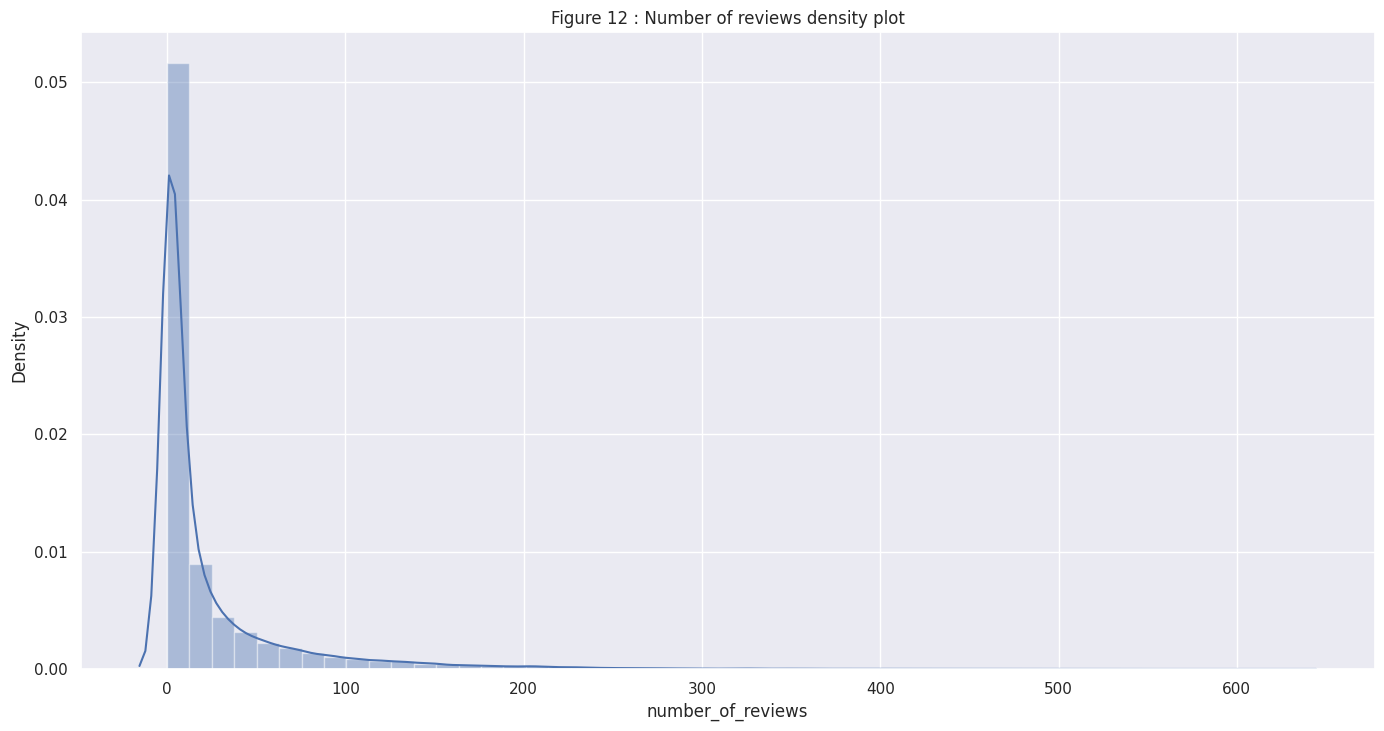

In [ ]:
# Creating a distplot
sns.distplot(airbnb_data_set["number_of_reviews"]).set_title('Figure 12 : Number of reviews density plot')

The purpose of choosing distplot here is to visualise the density of number of reviews for the listings. This method is accepting the 'number_of_reviews' as x parameter and density of rooms as y parameter.

Observations
*   By describing the number of reviews from the dataset, we observed that the average reviews from people are 23 with the standard deviation count as 44.
*   The maximum number of reviews among the listings are 629 and minimum is 0.  
*   From the graph, we can say that it is a right screwed

with very few homes rated above 200.  




### **'calculated_host_listings_count' attribute**

We observe that this attribute consists of numerical data. So, there is no point in checking the look or checking for the unique number of values present in this attributes. Instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on number_of_reviews attribute
airbnb_data_set.calculated_host_listings_count.describe()

count    48874.000000
mean         7.146458
std         32.959378
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#grouping by host id and taking sum of reviews per month
top_10_host_listings_count=airbnb_data_set.groupby(['host_id']).agg({'calculated_host_listings_count':'max'}).sort_values('calculated_host_listings_count',ascending=False).reset_index()
#taking top 10 from airbnb_data_set and storing it in list
top_10_host_listings_count_list=top_10_host_listings_count[:10]['host_id'].tolist()
# finding the names of all the top 10 host by host id
top_10_host_listings_count_df=airbnb_data_set[airbnb_data_set.host_id.isin(top_10_host_listings_count_list)].sort_values('calculated_host_listings_count',ascending=False)

<Figure size 1670x827 with 0 Axes>

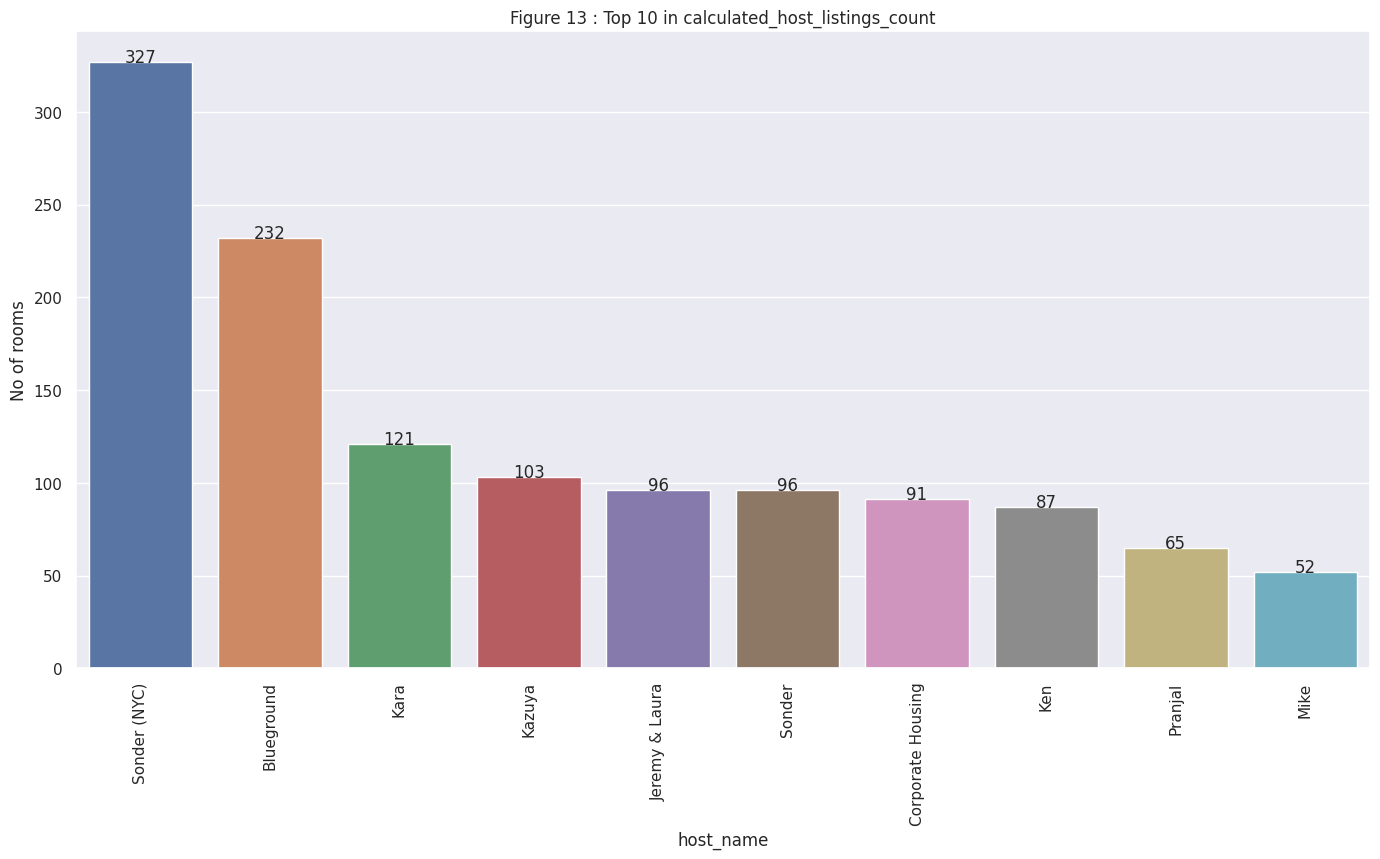

<Figure size 1670x827 with 0 Axes>

In [ ]:
# code to add the count on top of bar graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#creating a bar graph
sns.barplot(x="host_name", y='calculated_host_listings_count' ,data=top_10_host_listings_count_df).set_title('Figure 13 : Top 10 in calculated_host_listings_count')
# adding lables on bar graph
addlabels(top_10_host_listings_count_df.host_name.unique().tolist(),top_10_host_listings_count[:10]['calculated_host_listings_count'].tolist())
#adding y label to plot
plt.ylabel('No of rooms')
plt.xticks(rotation=90)
plt.figure(figsize=(16.7,8.27))

The purpose of using barplot is to visualise names of all the top 10 host by host id. This graph is accepting top 10 host names as x parameter and number of rooms as y parameter.

Observations


*   The top host is Sunder (NYC) with 327 rooms.
*   The least host is /mike with 52 rooms.  


### **'availability_365' attribute**


We observe that this attribute consists of numerical data. So, there is no point in checking the look or checking for the unique number of values present in this attributes. Instead, we can describe the attributes and have a look over them.

In [ ]:
# Let us have a look on number_of_reviews attribute
airbnb_data_set.availability_365.describe()

count    48874.000000
mean       112.793755
std        131.619934
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

<ipython-input-77-1f31c1c090a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_data_set.availability_365).set_title("Figure 14 : Availability_365 density plot")


Text(0.5, 1.0, 'Figure 14 : Availability_365 density plot')

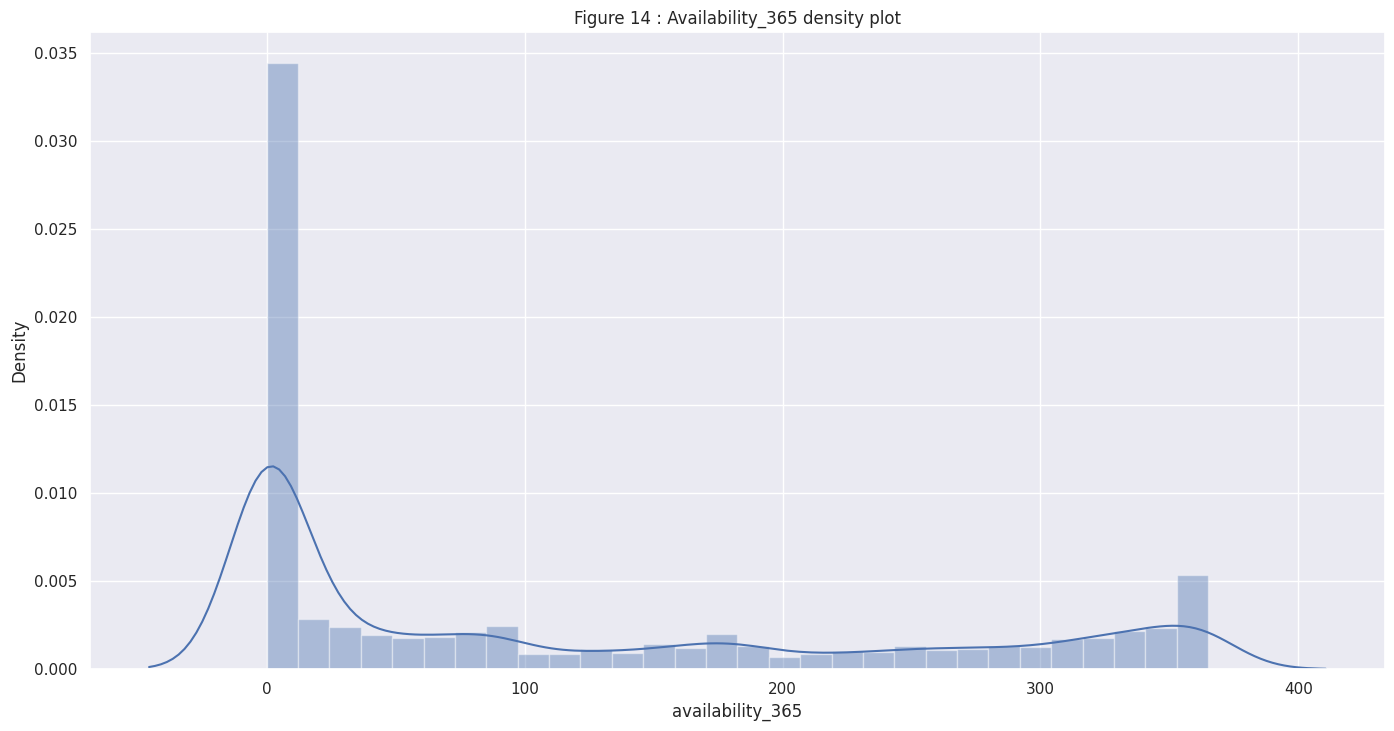

In [ ]:
sns.distplot(airbnb_data_set.availability_365).set_title("Figure 14 : Availability_365 density plot")

<ipython-input-78-ee47b855dead>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_365_0.availability_365).set_title("Figure 15 : Availability_365 density plot after removeing outliers")


Text(0.5, 1.0, 'Figure 15 : Availability_365 density plot after removeing outliers')

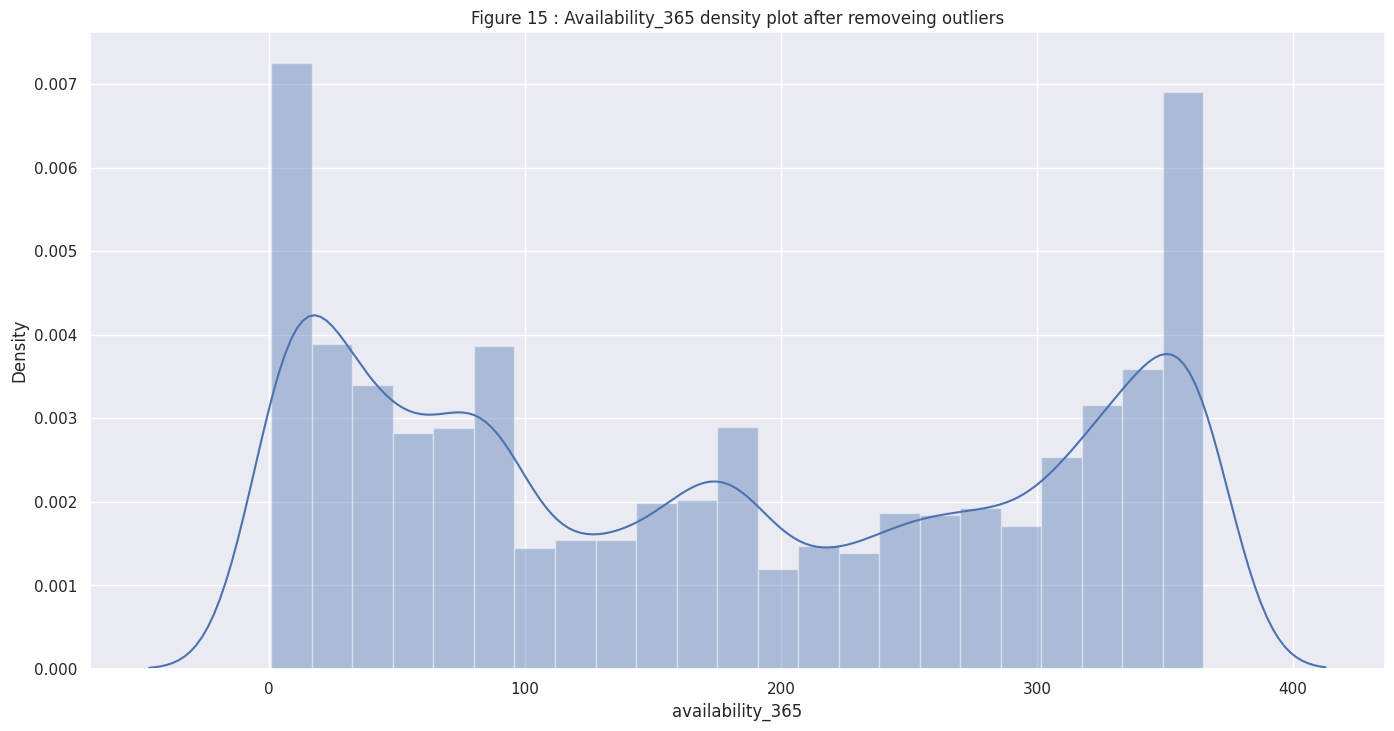

In [ ]:
# subsetting the database with values of min night under 35 to overcome outliners.
df_365_0=airbnb_data_set.loc[airbnb_data_set['availability_365']>0]
#creating a distplot
sns.distplot(df_365_0.availability_365).set_title("Figure 15 : Availability_365 density plot after removeing outliers")

The purpose of choosing distplot here is to visualise the density of the rooms availabe throughout the year. This method is accepting the 'minimum_nights'as x parameter and density of rooms as y parameter.

Observations


*   By describing the availability of rooms throughout the year from the dataset, we observed that the average availabe rooms throughout the year are 112 with the standard deviation of 131.
*   With the help of distplot, we observed that the data is bimodal in nature and hence creating a outliner.
*   In order to overcome the outliners in this attribute, we are considering the values from the dataset having atleast one room availabe during the year.



### ***Biivariate Analysis***

Bi denotes two, and another name for variable is “variate.” Thus, Bivariate analysis is the process of analysing two variables to ascertain their correlations. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. One of those is a dependent variable, while the other is an independent variable. A dependent variable is one whose value changes in response to an independent variable in a particular way.

Here, we will be trying to find the solutions for the problem statements stated as above.

1. In which neighbourhood there are highest listings?

In [ ]:
# count of neighbourhood
airbnb_A = airbnb_data_set.groupby(['neighbourhood_group','neighbourhood']).agg({'id':'count','price':'mean','number_of_reviews':'sum','reviews_per_month':'sum'}).sort_values(by='id',ascending=False)
airbnb_A.head(10)

id       price  number_of_reviews  \
neighbourhood_group neighbourhood                                             
Brooklyn            Williamsburg        3919  143.802501              85427   
                    Bedford-Stuyvesant  3714  107.678244             110352   
Manhattan           Harlem              2656  119.020708              75927   
Brooklyn            Bushwick            2464   84.819805              52513   
Manhattan           Upper West Side     1970  210.934010              36058   
                    Hell's Kitchen      1955  204.924297              49941   
                    East Village        1853  186.083108              44670   
                    Upper East Side     1797  188.872565              31686   
Brooklyn            Crown Heights       1563  112.520154              36408   
Manhattan           Midtown             1545  282.719094              19444   

                                        reviews_per_month  
neighbourhood_group neighbourhood                          
Brooklyn            Williamsburg                  3475.77  
                    Bedford-Stuyvesant            4874.52  
Manhattan           Harlem                        2955.21  
Brooklyn            Bushwick                      2632.49  
Manhattan           Upper West Side               1487.27  
                    Hell's Kitchen                2802.73  
                    East Village                  1668.40  
                    Upper East Side               1523.66  
Brooklyn            Crown Heights                 1560.82  
Manhattan           Midtown                       1264.09

From the above data set, we can figure out the following factors:


1.   The highest listing is in Williamsburg neighbourhood with Brooklyn as its neighbourhood group.  
2.   The second highest listing is also in Brooklyn neighbourhood group with Bedford-Stuyvesant as its neighbourhood.
3.   In general, we can conclude that top 10 highest listings are in Manhattan and Brooklyn neighbourhood group.

2. Which hosts are the busiest hosts in the region and earning highest revenues?

In [ ]:
# Let us find the maximum count of listing on airbnb. This can be done by considering the maximum value in the "calculated_host_listings_count" column.
airbnb_data_set['calculated_host_listings_count'].max()

327

In [ ]:
# Let us check highest listing on airbnb of particular host in particular neighbourhood
maximum_listing = airbnb_data_set[airbnb_data_set['calculated_host_listings_count']==327]
maximum_listing

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
38293,30181691,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309,8758
38294,30181945,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219,6641
38588,30347708,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159,6728
39769,30937590,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91,524
39770,30937591,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339,3915
47692,35871511,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342,4785
47693,35871515,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347,4785
47814,35936418,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327,20271


It is clear that Sonder with host ID **219517861** and calculated host listings count as **327** in the neighbourhood of Manhattan is the busiest host according to the listing count as well as the availability of room over the year.

In [ ]:
#grouping of host by their highest listing
airbnb_B = airbnb_data_set.groupby(['calculated_host_listings_count','host_name','host_id']).agg({'revenues':'mean','id':'count'}).sort_values(by='id',ascending=False).head(10)
airbnb_B

revenues   id
calculated_host_listings_count host_name         host_id                     
327                            Sonder (NYC)      219517861   2906.584098  327
232                            Blueground        107434423   9735.258621  232
121                            Kara              30283594    9621.842975  121
103                            Kazuya            137358866   1314.757282  103
96                             Sonder            12243051    6177.906250   96
                               Jeremy & Laura    16098958    6268.750000   96
91                             Corporate Housing 61391963    4439.670330   91
87                             Ken               22541573    6463.103448   87
65                             Pranjal           200380610  10220.307692   65
52                             Mike              1475015     3092.307692   52

Here, we can see that, highest listing is of **Sonder(NYC)-327**, followed by
**Blueground(232), then Kara(121), Kazuya(103), Sonder(96)** etc.

In [ ]:
# highest average revenue earning host
airbnb_B.sort_values(by='revenues',ascending=False)

revenues   id
calculated_host_listings_count host_name         host_id                     
65                             Pranjal           200380610  10220.307692   65
232                            Blueground        107434423   9735.258621  232
121                            Kara              30283594    9621.842975  121
87                             Ken               22541573    6463.103448   87
96                             Jeremy & Laura    16098958    6268.750000   96
                               Sonder            12243051    6177.906250   96
91                             Corporate Housing 61391963    4439.670330   91
52                             Mike              1475015     3092.307692   52
327                            Sonder (NYC)      219517861   2906.584098  327
103                            Kazuya            137358866   1314.757282  103

It is clear from the data set that Pranjal has highest revenue earning host whose listing count is 65 and then followed by Blueground, Kara, Ken, etc.

3. Which hosts are earning highest revenues with respect to one lisitng and by one visit?

In [ ]:
# check the highest revenue earning host by one listing and by one visit
airbnb_A = airbnb_data_set.sort_values(by='revenues',ascending=False)
airbnb_A

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
48043,36056808,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.00,1,365,1170000
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1000000
12342,9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,989901
17811,13963005,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,0.00,1,364,857750
44429,34221161,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,0.00,2,0,730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795,20639792,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232,0
25794,20639628,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176,0
25778,20624541,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73,0
25433,20333471,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127,0


The highest revenue earned by one listing and by one visit is of host **Jenny**(Manhattan NG, Tribeca N, Entire home) followed by the **Kathrine**(Queens NG, Astoria neighbourhood, private room), etc. Here, we can also observe that minimum nights spent are more than 100 days which implies that these host wanted to rent out room for long term only. Also, we can see that the prices are much higher. But reviews per month is much lower, so we conclude that the frequency of visits is very less.

4. Which hosts are having highest price in the data set?

In [ ]:
# highest prices
airbnb_data_set.sort_values(by='price',ascending=False).head(10)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
29238,22436899,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,300000
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1000000
17692,13894339,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,50000
40433,31340283,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365,299970
6530,4737930,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,49995
12342,9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,989901
30268,23377410,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251,255000
4377,2953058,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365,8000
29662,22779726,156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146,7703
45666,34895693,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,2,179,7500


*   The highest price among the host are of Jelena(Manhattan NG, Upper West Side N, entire home/apt), Kathrine(Queens NG, Astoria N, private room) and Erin(Brooklyn NG, Greenpoint N, entire home/apt) having their price as 10000.
*   The second highest price among the host are of Matt(Manhattan NG,	Lower East Side N, entire home/apt), Olson(Manhattan NG, East Harlem N, Entire home/apt) and Amy(Manhattan NG, Lower East Side N, Private room) having their price as 9999.
*   The third highest price among the host is of Rum(Manhattan	NG, Tribeca N, Entire home/apt) having the price as 8500.


5. What are the hosts having highest frequencies of visit per month and why?

In [ ]:
# to see the reviews per month(frequency of visits per month)
airbnb_A = airbnb_data_set.sort_values(by='reviews_per_month',ascending=False)
airbnb_A.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
42075,32678719,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.50,9,299,100
42076,32678720,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,27.95,9,299,199
38870,30423106,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,20.94,1,134,45
27287,21550302,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,19.75,3,26,80
28651,22176831,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,17.82,3,25,50


Here we can that, whose reviews per month is high i.e. the frequency of visit is highest has less minimum night stay requirement. Thus, we can see that, price is much less whose reviews per month is high.

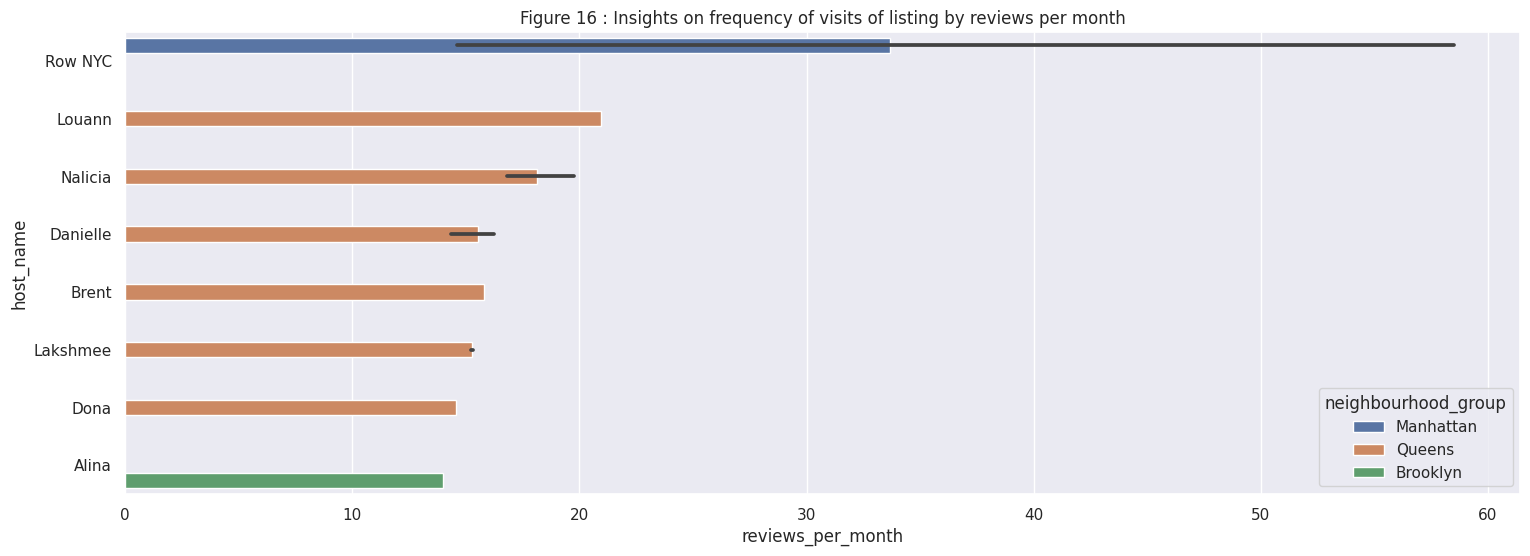

In [ ]:
# graphical distribution of reviews per month
plt.figure(figsize=(18,6))
plt.title('Figure 16 : Insights on frequency of visits of listing by reviews per month')
sns.barplot(data=airbnb_A.head(15),y='host_name',x='reviews_per_month',hue='neighbourhood_group');

Having x axis as "reviews_per_month" and y axis as "host_name' in the bar plot, we can say that Row NYC host has the highest count of reviews which indicates that Row NYC host has the highest frequency of visits of listing, followed by Louann, Nalicia, Danielle,etc

6. Which neighbourhood group is most and least demanded location?

In [ ]:
# creating the database having Manhattan as neighbourhood and with revenues greater than 10000.
manhattan_airbnb = airbnb_data_set[(airbnb_data_set['neighbourhood_group']=='Manhattan') & (airbnb_data_set['revenues']>=10000)].sort_values(by='revenues',ascending=False).head(10)
# creating the database having Brooklyn as neighbourhood and with revenues greater than 10000.
brooklyn_airbnb = airbnb_data_set[(airbnb_data_set['neighbourhood_group']=='Brooklyn') & (airbnb_data_set['revenues']>=10000)].sort_values(by='revenues',ascending=False).head(10)
# creating the database having Queens as neighbourhood and with revenues greater than 10000.
queens_airbnb = airbnb_data_set[(airbnb_data_set['neighbourhood_group']=='Queens') & (airbnb_data_set['revenues']>=10000)].sort_values(by='revenues',ascending=False).head(10)
# creating the database having Bronx as neighbourhood and with revenues greater than 10000.
bronx_airbnb = airbnb_data_set[(airbnb_data_set['neighbourhood_group']=='Bronx') & (airbnb_data_set['revenues']>=5000)].sort_values(by='revenues',ascending=False).head(10)
# creating the database having Staten Island as neighbourhood and with revenues greater than 10000.
staten_island_airbnb = airbnb_data_set[(airbnb_data_set['neighbourhood_group']=='Staten Island') & (airbnb_data_set['revenues']>=5000)].sort_values(by='revenues',ascending=False).head(10)

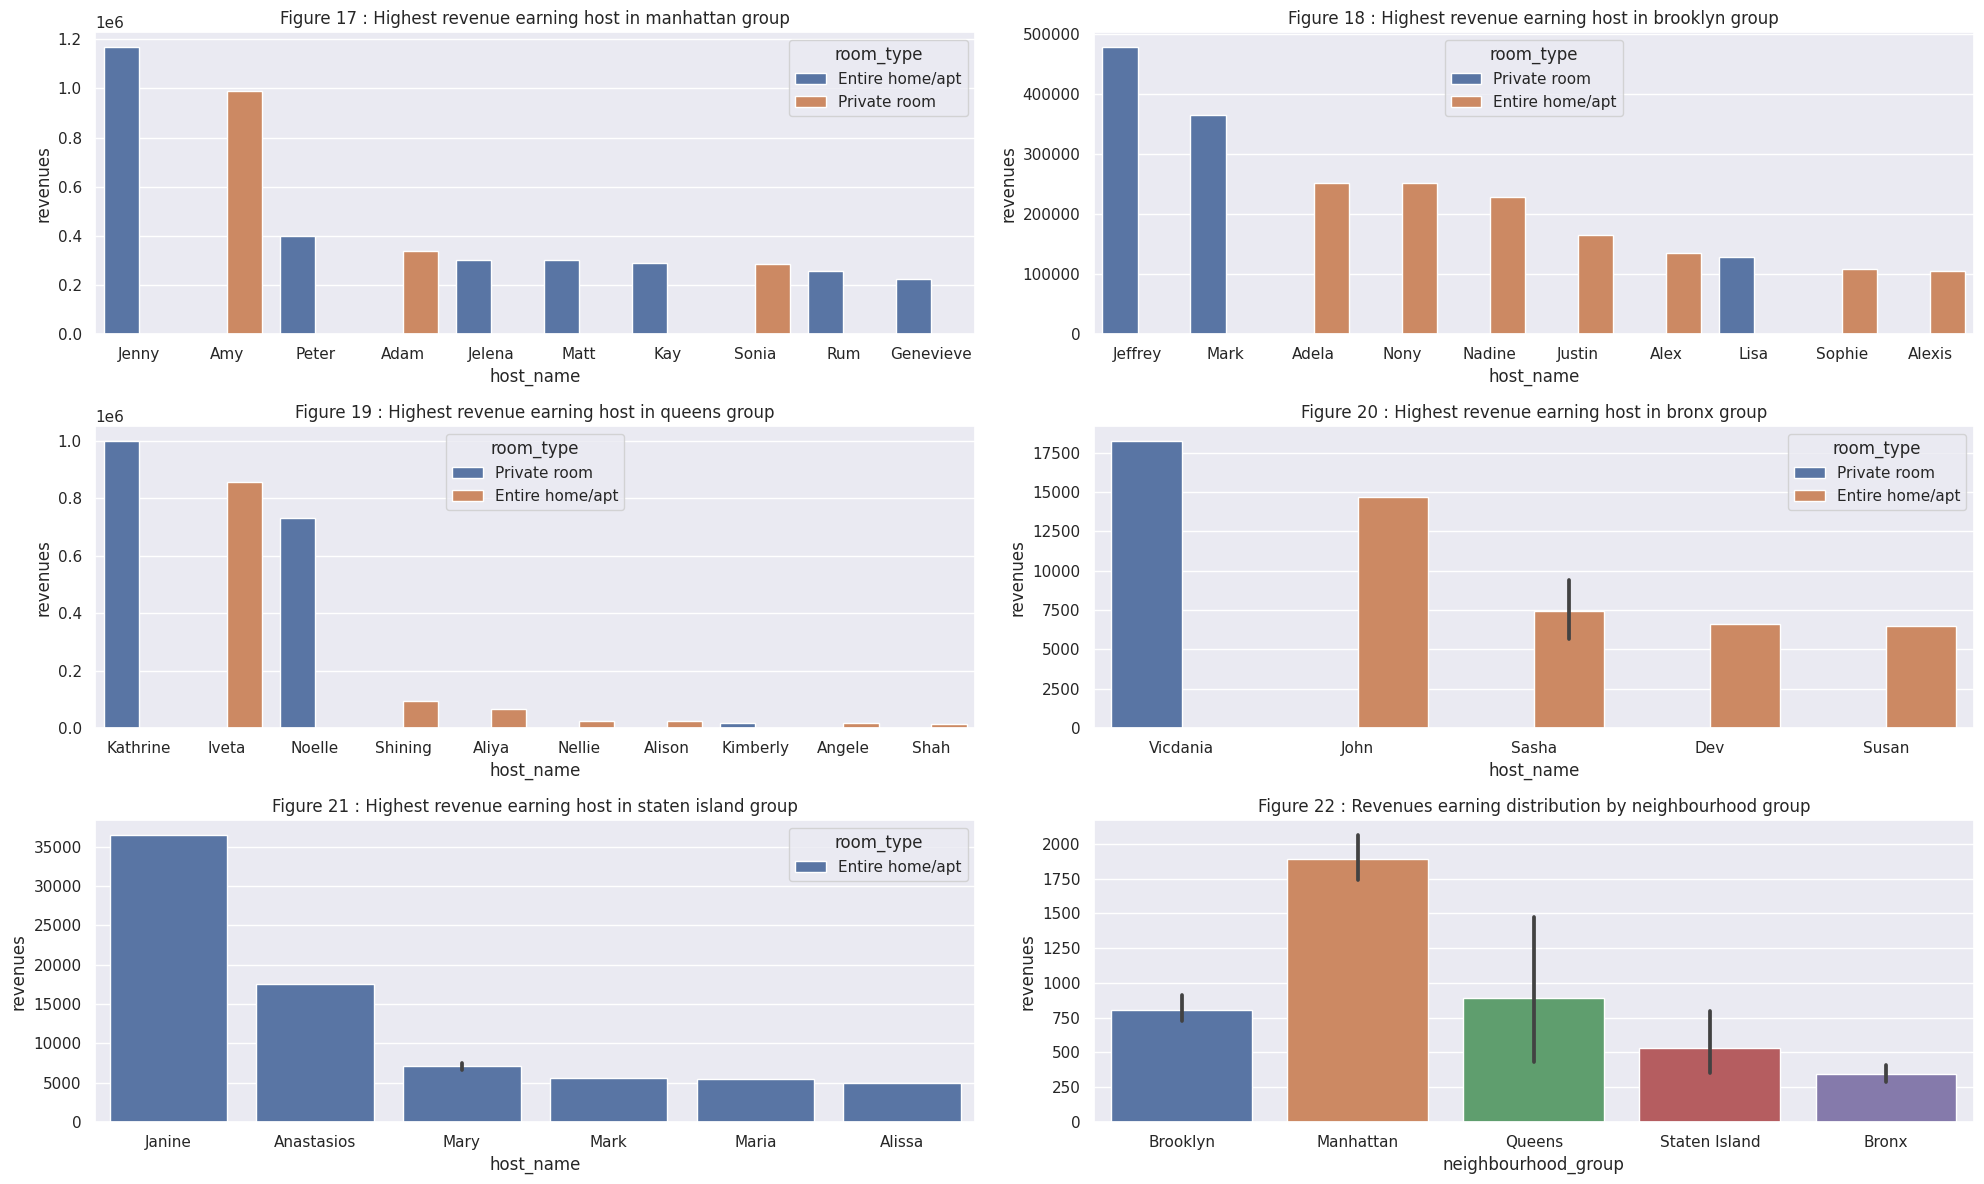

In [ ]:
fig,axes =plt.subplots(3,2,figsize=(20,12))

axes[0,0].set_title('Figure 17 : Highest revenue earning host in manhattan group')
sns.barplot(x=manhattan_airbnb.host_name,y=manhattan_airbnb.revenues,hue=manhattan_airbnb.room_type,ax=axes[0,0])

axes[0,1].set_title('Figure 18 : Highest revenue earning host in brooklyn group')
sns.barplot(x=brooklyn_airbnb.host_name,y=brooklyn_airbnb.revenues,hue=brooklyn_airbnb.room_type,ax=axes[0,1])

axes[1,0].set_title('Figure 19 : Highest revenue earning host in queens group')
sns.barplot(x=queens_airbnb.host_name,y=queens_airbnb.revenues,hue=queens_airbnb.room_type,ax=axes[1,0])

axes[1,1].set_title('Figure 20 : Highest revenue earning host in bronx group')
sns.barplot(x=bronx_airbnb.host_name,y=bronx_airbnb.revenues,hue=bronx_airbnb.room_type,ax=axes[1,1])

axes[2,0].set_title('Figure 21 : Highest revenue earning host in staten island group')
sns.barplot(x=staten_island_airbnb.host_name,y=staten_island_airbnb.revenues,hue=staten_island_airbnb.room_type,ax=axes[2,0])

axes[2,1].set_title('Figure 22 : Revenues earning distribution by neighbourhood group')  #highest revenue earning neighbourhood group
sns.barplot(x=airbnb_data_set['neighbourhood_group'],y=airbnb_data_set['revenues'],ax=axes[2,1])

plt.tight_layout()

From the above simple bar diagrams, we observe the following:

* Highest revenue earned by one visit and by one listing is of Jenny, Amy,
Peter, Adam, Jelena, etc in Manhattan NG.
* Highest revenue earned by one visit and by one listing is of Jeffrey, Mark, Adela etc in Brooklyn NG.
* Highest revenue earned by one visit and by one listing is of Kathrine,Iveta,Noelle etc in Queens NG.
* Highest revenue earned by one visit and by one listing is of Vicdania, John, Sasha etc in Bronx NG.
* Highest revenue earned by one visit and by one listing is of Janine, Anastasios,Mary,Mark etc in Staten Island NG.
* Highest revenue is earned by the neighbourhood group Manhatten.

So, we can conclude that Manhattan area is much crowdy or most demanded location and least by Bronx neighbourhood group.

7. What can we learn from the data present in the given data set ? (For ex. number of reviews, price, minimum nights etc)

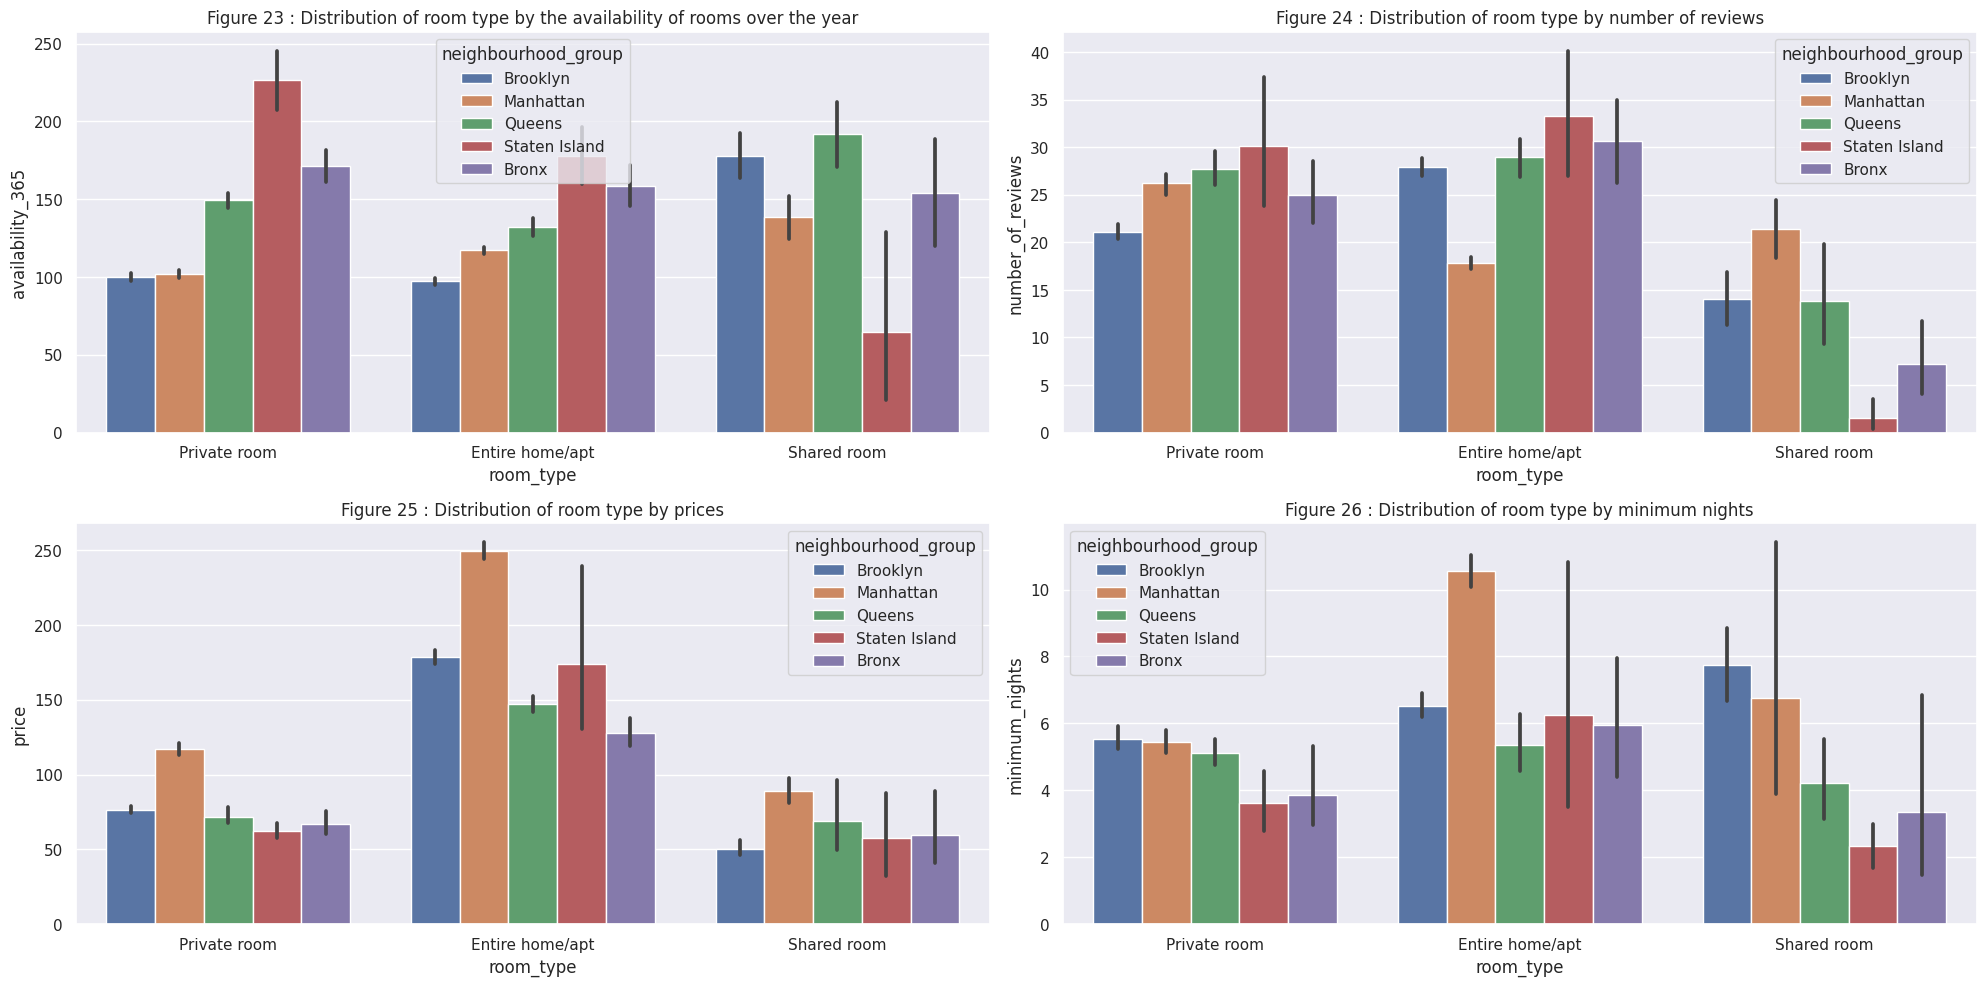

In [ ]:
# vizualization of number of reviews, price, availability of rooms over the year, minimum nights
fig,axes =plt.subplots(2,2,figsize=(20,10))

axes[0,0].set_title('Figure 23 : Distribution of room type by the availability of rooms over the year')
sns.barplot(x=airbnb_data_set.room_type,y=airbnb_data_set.availability_365,hue=airbnb_data_set.neighbourhood_group,ax=axes[0,0]) # availability of rooms over the year in different neighbourhood group

axes[0,1].set_title('Figure 24 : Distribution of room type by number of reviews')
sns.barplot(x=airbnb_data_set.room_type,y=airbnb_data_set.number_of_reviews,hue=airbnb_data_set.neighbourhood_group,ax=axes[0,1]) # number of reviews by room type in different neighbourhood group

axes[1,0].set_title('Figure 25 : Distribution of room type by prices')
sns.barplot(x=airbnb_data_set.room_type,y=airbnb_data_set.price,hue=airbnb_data_set.neighbourhood_group,ax=axes[1,0]) # variation of price by room type in different neighbourhood group

axes[1,1].set_title('Figure 26 : Distribution of room type by minimum nights')
sns.barplot(x=airbnb_data_set.room_type,y=airbnb_data_set.minimum_nights,hue=airbnb_data_set.neighbourhood_group,ax=axes[1,1]) # variation of night by room type in different neighbourhood group

plt.tight_layout(pad=1)

From the above multiple bar diagrams, we observe the following:

*   From the figure 9, we can say that the highest average availability of room over the year is for **Private room (Staten Island NG)** followed by **shared room (Queens NG)**. The least average availability of room and highest deviation among data is for **shared room (Staten Island NG)**.
*   From the figure 10, we can say that the average highest number of reviews is of **Staten Island NG (Entire home)** followed by **Bronx NG (Entire home)** neighbourhood group. The least number of reviews is of **Staten Island NG (Shared room)** neighbourhood group.
*   From the figure 11, we can say that in every room type, the average highest price  is of **Manhattan neighbourhood group** and the highest price is for entire home followed by private room and share room. The highest variations of prices is in **Staten Island neighbourhood group** for entire home.
*   From the figure 12, we can say that the highest average minimum nights is in **Manhatten neighbourhood group** of entire home room type. The highest variation in the minimum nights can be seen in **Manhatten neighbourhood group** of **share room type**.


8.  With the help of graphical visulisation, what can we learn about room type, price distributions, availability of rooms over the year and number of night stays?

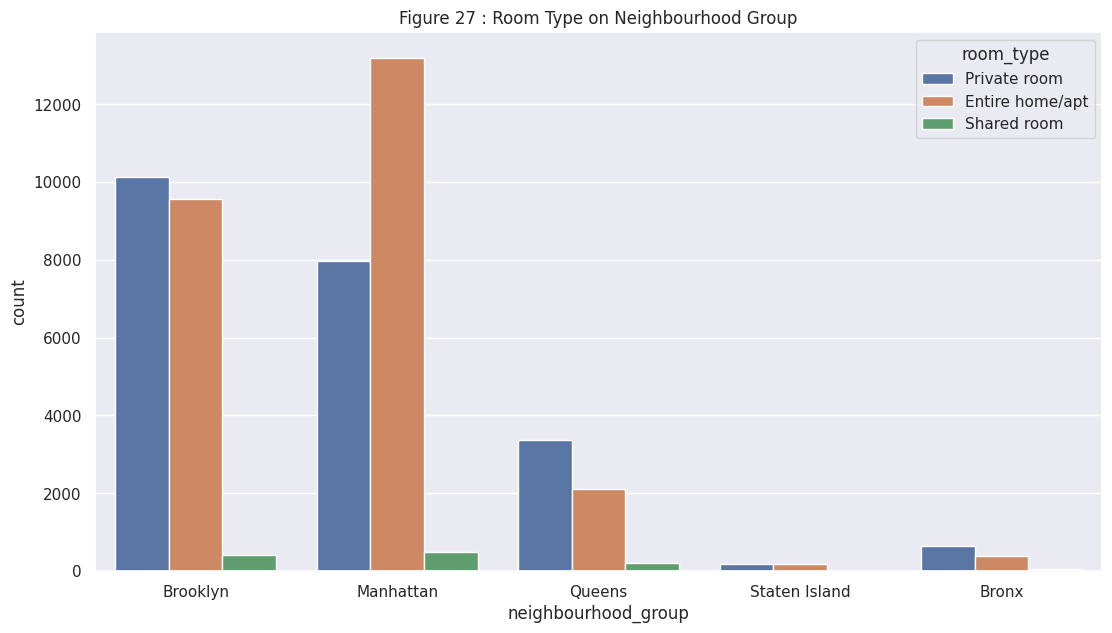

In [ ]:
#let's count the listing of different neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Figure 27 : Room Type on Neighbourhood Group")
sns.countplot(x=airbnb_data_set['neighbourhood_group'],hue=airbnb_data_set['room_type'])
plt.show();

The highest listing is in Manhattan neighbourhood group (for entire home) followed by Brooklyn neighbourhood group (for private room). The least available room type is in Bronx neighbourhood group (for shared room).

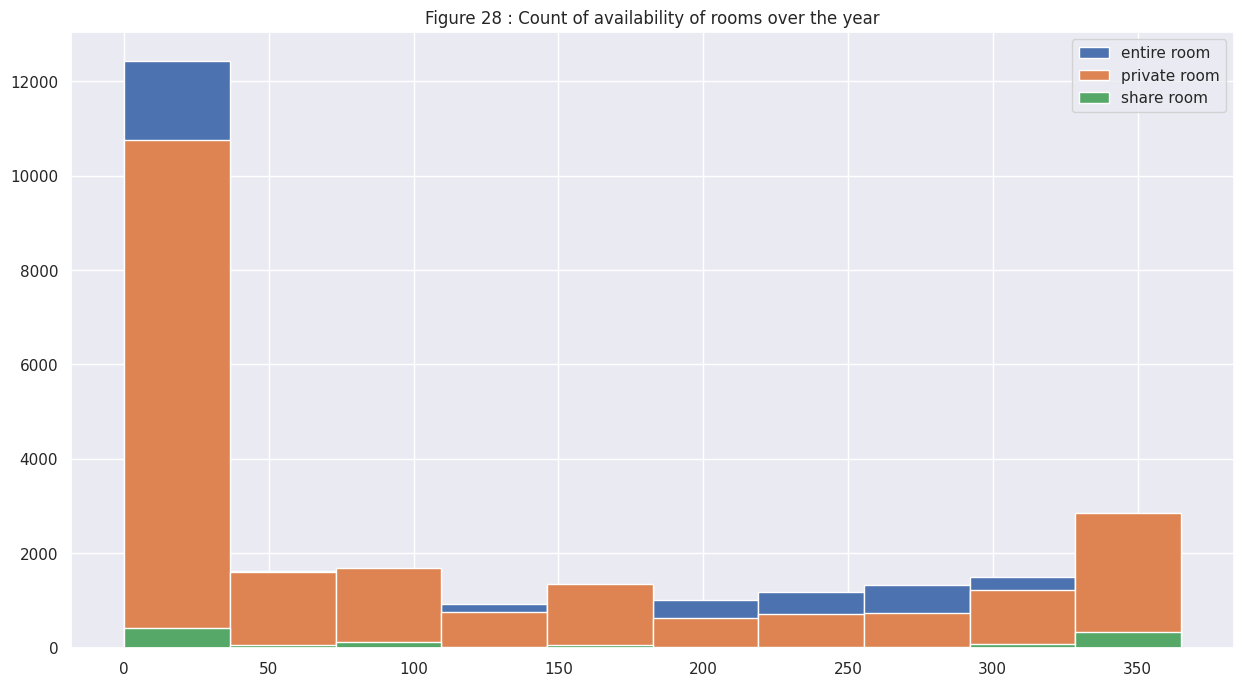

In [ ]:
#let us count the availability of room over the year
entire_room = airbnb_data_set[airbnb_data_set['room_type']=='Entire home/apt']
private_room = airbnb_data_set[airbnb_data_set['room_type']=='Private room']
share_room = airbnb_data_set[airbnb_data_set['room_type']=='Shared room']

plt.figure(figsize=(15,8))
plt.title("Figure 28 : Count of availability of rooms over the year")
plt.hist(entire_room.availability_365)
plt.hist(private_room.availability_365)
plt.hist(share_room.availability_365)
plt.legend(['entire room','private room','share room'])


plt.show();

One has to carefully observe that majority of rooms are available for a duration of 0 to 40 days approximately. The rooms that are available throughout the year are very less.

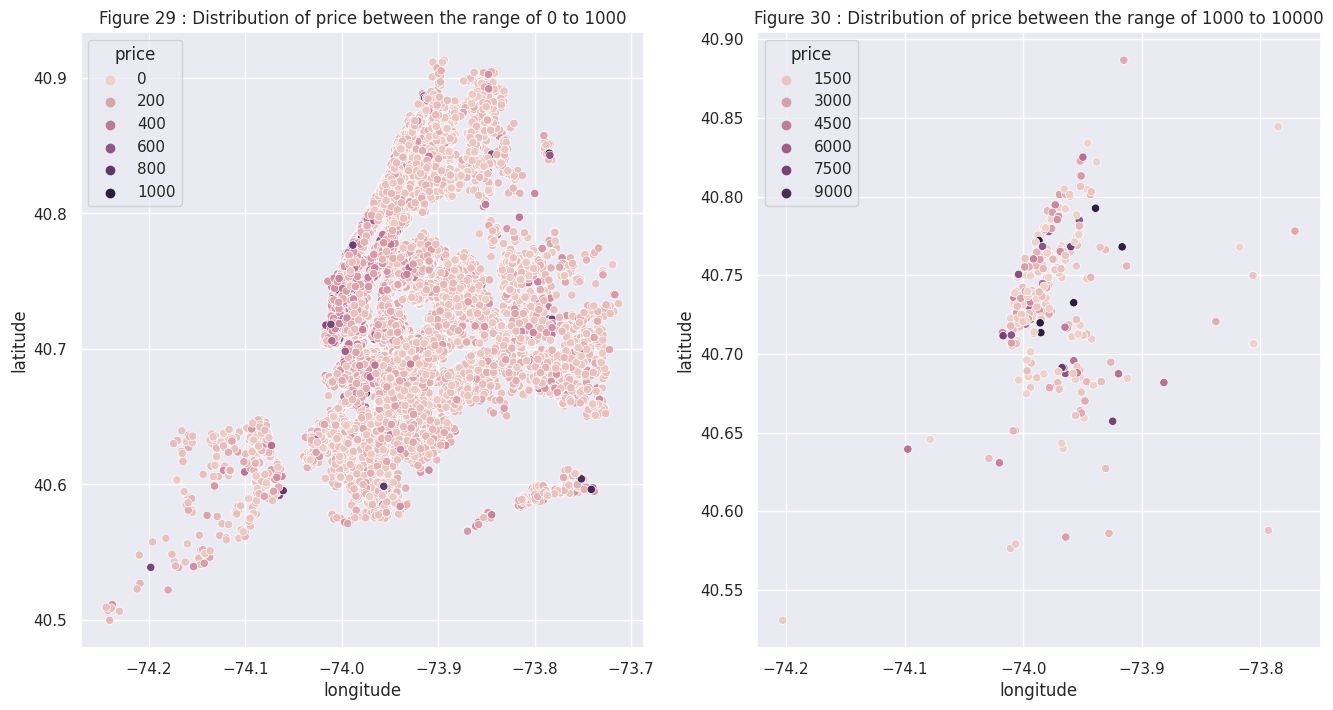

In [ ]:
#distribution and frequency of prices in different region
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Figure 29 : Distribution of price between the range of 0 to 1000')
sns.scatterplot(x=airbnb_data_set.longitude,y=airbnb_data_set.latitude,hue=airbnb_data_set[airbnb_data_set['price']<=1000].price)
plt.subplot(1,2,2)
plt.title('Figure 30 : Distribution of price between the range of 1000 to 10000')
sns.scatterplot(x=airbnb_data_set.longitude,y=airbnb_data_set.latitude,hue=airbnb_data_set[airbnb_data_set['price']>=1000].price)


plt.show()

Here, we can conclude that highest frequency of listing is in price range of 0 to 1000 and the least frequency is in the price range of 1000 to 10000.

In [ ]:
#let us find the highest number of minimum nights stay requirement by host name.
max_nights = airbnb_data_set[['id','host_name','number_of_reviews','neighbourhood_group','neighbourhood','price','room_type','minimum_nights','availability_365','reviews_per_month','revenues']].sort_values('minimum_nights',ascending=False)
max_nights.head(5)

,id,host_name,number_of_reviews,neighbourhood_group,neighbourhood,price,room_type,minimum_nights,availability_365,reviews_per_month,revenues
5767,4204302,Genevieve,2,Manhattan,Greenwich Village,180,Entire home/apt,1250,365,0.03,225000
2854,1615764,Peter,0,Manhattan,Battery Park City,400,Entire home/apt,1000,362,0.00,400000
38664,30378211,Meg,0,Manhattan,Greenwich Village,110,Shared room,999,365,0.00,109890
26341,20990053,Angie,24,Brooklyn,Williamsburg,79,Private room,999,249,1.12,78921
13404,10053943,Glenn H.,2,Manhattan,Harlem,99,Entire home/apt,999,42,0.07,98901


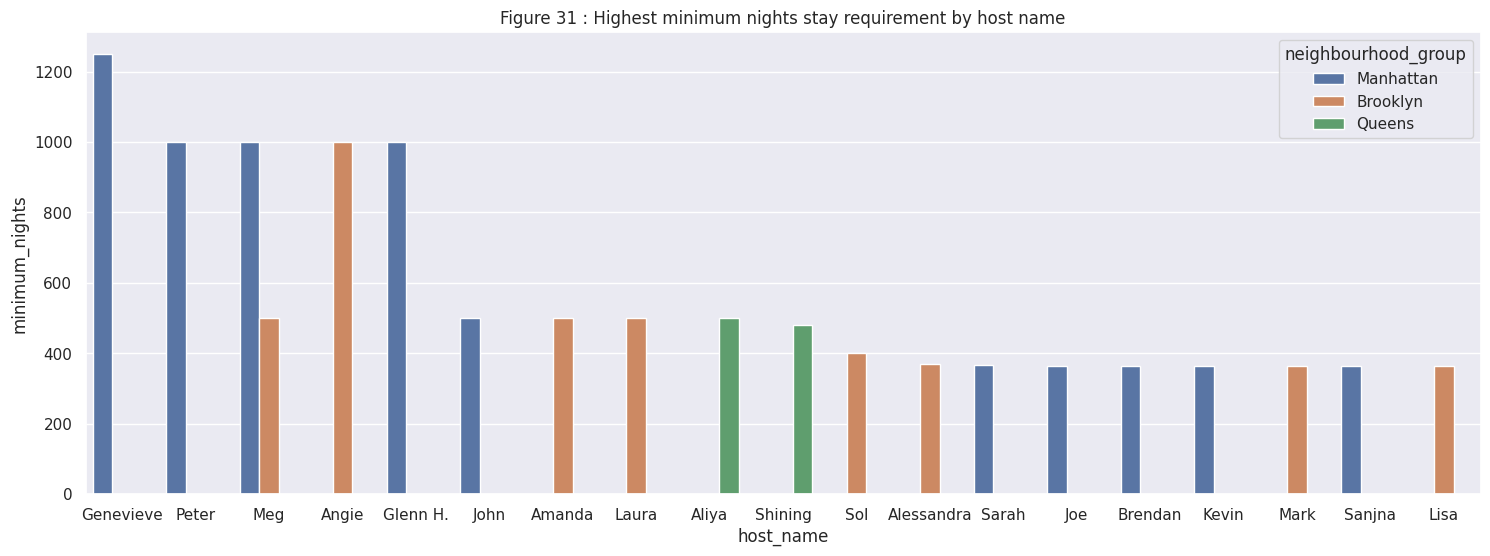

In [ ]:
#let us represent highest number of minimum nights stay requirement by host name graphically.
plt.figure(figsize=(18,6))
plt.title('Figure 31 : Highest minimum nights stay requirement by host name')
sns.barplot(data=max_nights.head(20),x='host_name',y='minimum_nights',hue='neighbourhood_group');

The Highest minimum nights is of listing id-4204302 in the Manhattan NG and Greenwitch Village N rented by the host Genevieve also availability of that particular entire home is over the year. Here Genevieve, Peter, Meg, Angie, etc are those host who only want to attract only long term guests. We can also see from reviews per month that the frequency of visits of listing is less for long term minimum nights. also the number of reviews is also less for long term minimum nights.

9. What is the correlation between different variables?

<ipython-input-96-46bc33671ba0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_data_set.corr(method='kendall')


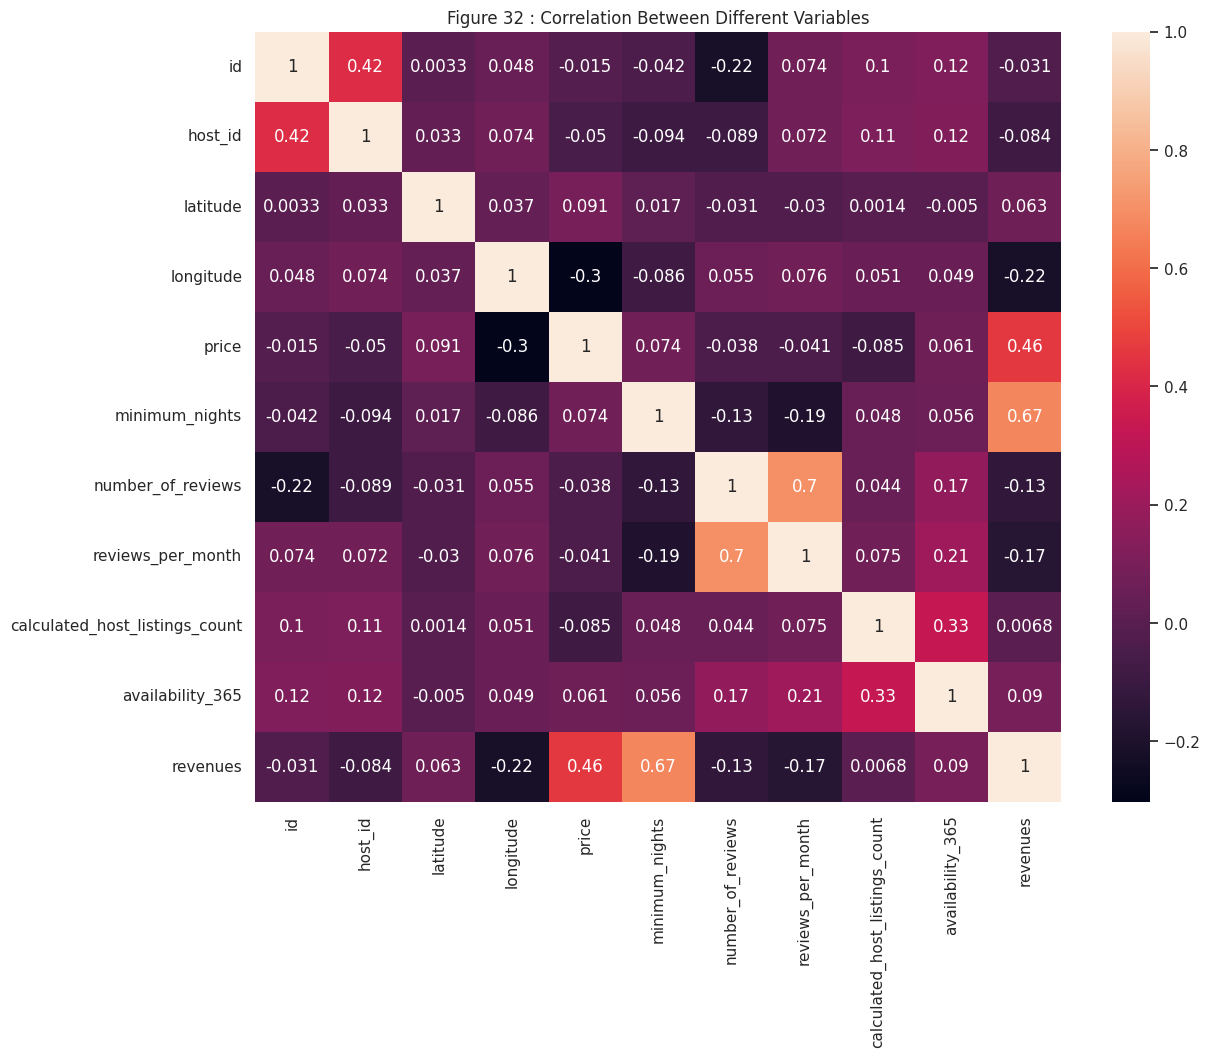

In [ ]:
#correlation between different attributes
corr = airbnb_data_set.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Figure 32 : Correlation Between Different Variables")
sns.heatmap(corr, annot=True)
plt.show()

From this graphical representation of correleation among the data set, we can observe the following:

* The highest positive correlation among the attributes of the given database is between number_of_reviews and reviews_per_month. As a result, for a room if the numberof reviews is greater, there are higher chances that reviews per month will also be higher. followed by revenues and minimum nights.
* We can also observe that revenues and minimum nights are second highly correlated. So, we can conclude that as the minimum nights for a listings are higher, the revenue for that particular host will be high.

* The highest negative correlation among the attributes of the given database is between price and longitude followed by number_of_reviews and longitude.

10. By performing bivariate analysis, what can we say about the different categorical data present in the given data set?

<Figure size 1200x1200 with 0 Axes>

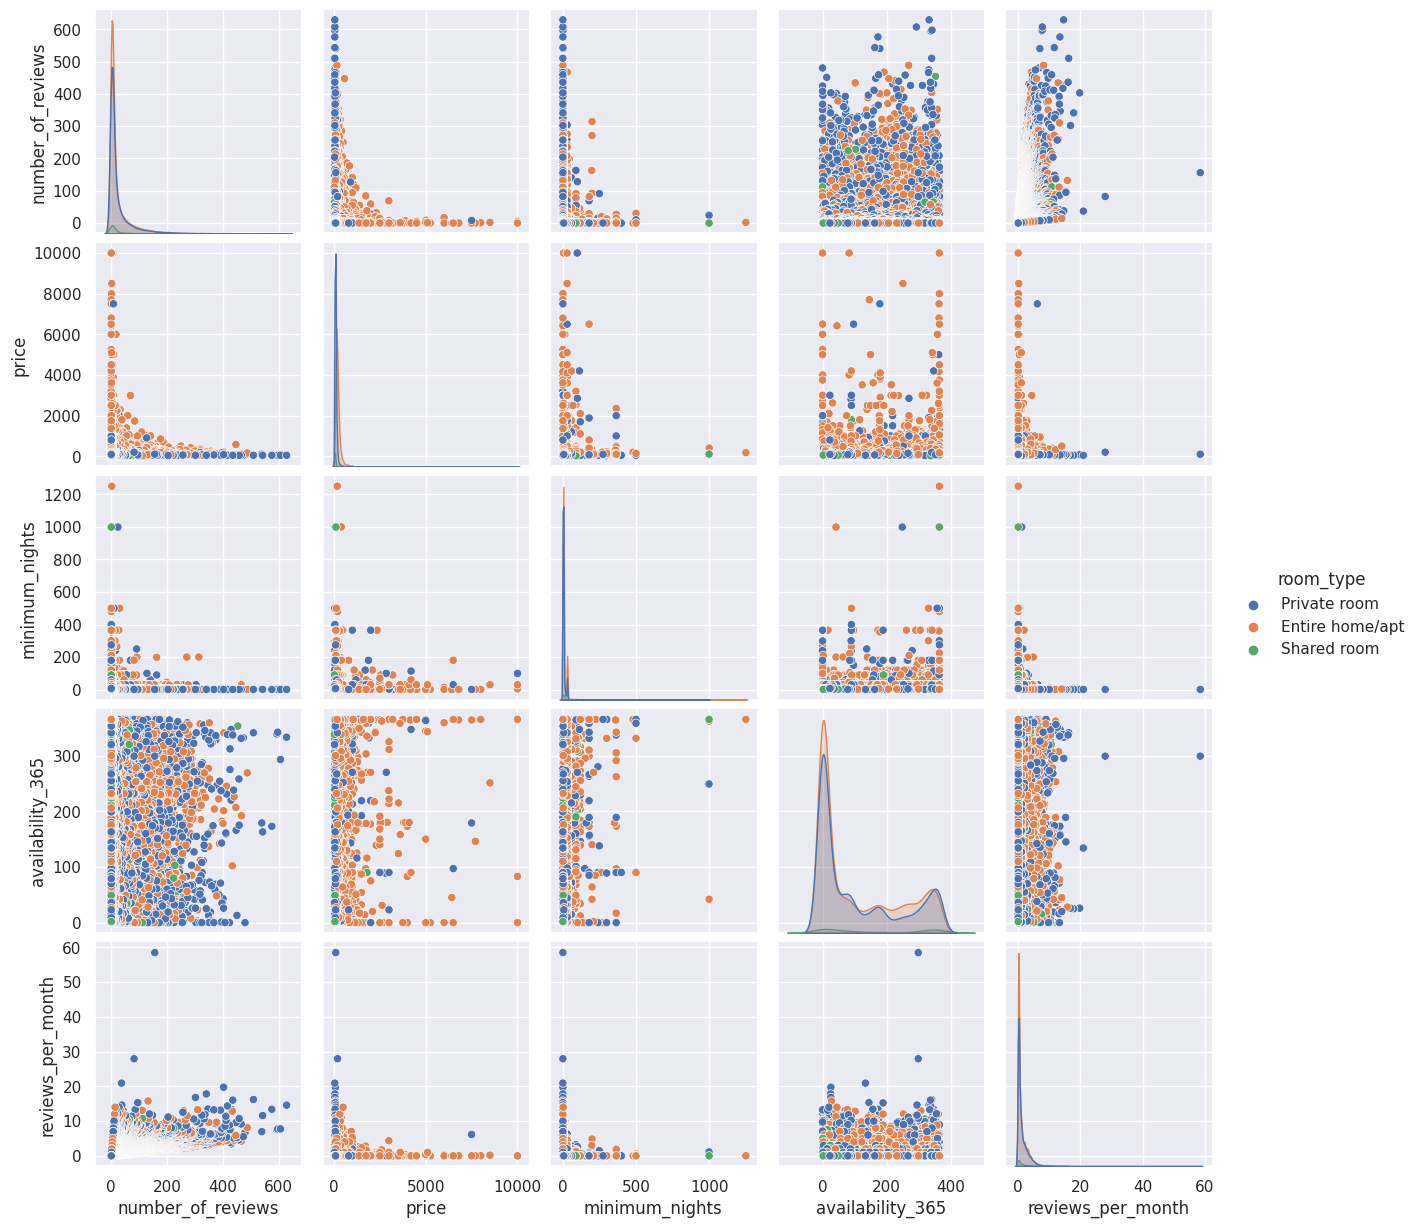

In [ ]:
#Let us represent the categorical data in pairplot visulisation.
plt.figure(figsize=(12,12))
categorical_data = airbnb_data_set[['number_of_reviews','neighbourhood_group','price','room_type','minimum_nights','availability_365','reviews_per_month']]
sns.pairplot(categorical_data,hue='room_type');

 From the above pairplot visulisation, we have the following observation:
 * **no_of_reviews vs price :** We can see from above pairplot that as the price increases number of reviews decreases and vice versa. The highest number of reviews are getting by the listing whose price range is between 0-1000$ which is a private room type.
 * **minimum_nights vs availability_365 :** Most of host set minimum nights stay for 2-200 days in the particular year.
 * **no_of_reviews vs minimum_nights :** Most of the number of reviews are from those whose minimum night stay is for 0-100 nights. We can see as we go upper along the minimum night axis it is begining to diminished. Also we can say that most host prefer to rent out their property for long term.
 * **minimum_nights vs price:** Most host whose requirement of minimum night is high they prefer to put less price range.
 * **reviews per month vs price:** We can see that, where there is less price, the reviews per month i.e., frequency of visit is high.
 * **reviews per month vs minimum nights:** We can see that, where there is less minimum night stay requirment, the frequency of visits i.e. reviews per month is high.

## ***6. Solution to Business Objective***

We have done quite data analysis for the given database and plotted 33 charts. Let us suggest the clients how to achieve Business Objectives with the help of our EDA work.




1.   Top listings in the region
      * The highest listing is in **Williamsburg neighbourhood** which is in Brooklyn neighbourhood group.
      * The second highest is also in Brooklyn neighbourhood group which is **Bedford-Stuyvesant**
      * The third highest is in **Harlem neighbourhood** which is in Manhattan neighbourhood group.
      * The top ten listings of the region are from Manhattan and Brooklyn neighbourhood group.

2.   Top 5 highest listings in the region
      * Sonder(NYC)-327
      * Blueground - 232
      * Kara - 121
      * Kazuya - 103
      * Sonder - 96


3.  Top 5 highest revenue earning hosts
      * Pranjal - 10220
      * Blueground - 9735
      * Kara - 9631
      * Ken - 6463
      * Jeremy & Laura	- 6268

4.   Top 3 highest revenue earning hosts with respect to one listing and by one visit.
      * Jenny(Manhattan NG, Tribeca N, Entire home)
      * Kathrine(Queens NG, Astoria N, private room)
      * Amy(Manhattan NG, Lower East Side	N, private room)


**Note:-** One can observe here that if the minimum nights are more than 100 days, it implies that these hosts wanted to rent out he room for long term only. Also, if the prices are much higher but the reviews per month is lower, we can conclude that the frequency of visits are much less.

5.   Top 3 highest prices among the hosts
      * The highest price among the host are of Jelena(Manhattan NG, Upper West Side N, entire home/apt), Kathrine(Queens NG, Astoria N, private room) and Erin(Brooklyn NG, Greenpoint N, entire home/apt) having their price as 10000.
      * The second highest price among the host are of Matt(Manhattan NG,	Lower East Side N, entire home/apt), Olson(Manhattan NG, East Harlem N, Entire home/apt) and Amy(Manhattan NG, Lower East Side N, Private room) having their price as 9999.
      * The third highest price among the host is of Rum(Manhattan	NG, Tribeca N, Entire home/apt) having the price as 8500.

6.   Top 3 hosts having highest frequencies of visits per month
      * Row NYC
      * Louann
      * Nalicia
      * **Note:-** These hosts have hishest frequnecies of visits per month since the minimum night stay requirement is less. So, we can see that the price is much less whose reviews per month is high.

7.   Highest revenues earned by one visit and by one listing in different neighbourhood groups in Manhattan neighbourhood group
      * Jenny
      * Amy
      * Peter
      * Adam
      * Jelena

8. Highest revenues earned by one visit and by one listing in different neighbourhood groups in Brooklyn neighbourhood group
      * Jeffrey
      * Mark
      * Adela
      * Nony
      * Nadine

9. Highest revenues earned by one visit and by one listing in different neighbourhood groups in Queens neighbourhood group
      * Kathrine
      * Iveta
      * Noelle
      * Shining
      * Aliya

10. Highest revenues earned by one visit and by one listing in different neighbourhood groups in Bronx neighbourhood group
      * Vicdania
      * John
      * Sasha
      * Dev
      * Susan

11. Highest revenues earned by one visit and by one listing in different neighbourhood groups in Staten Island neighbourhood group
      * Janine
      * Anastasios
      * Mary
      * Mark
      * Maria

**Note:-** Highest revenue is earned by the **Manhatten** neighbourhood group. So, we can conclude that Manhattan area is much crowdy or most demanded location and least earned revenue is by Bronx neighbourhood group.

12. The vizualization of number of reviews, price, availability of rooms over the year, minimum nights are as follows:
      * Number of reviews:- The average highest number of reviews is of Staten Island(Entire home) neighbourhood group followed by Bronx(Entire home) neighbourhood group. The least number of reviews is of Staten Island(Shared room)
      * Price:- In every room type, the average highest price is of Manhattan neighbourhood group and highest price is of entire home followed by private and share room. The highest variation of prices is in Staten Island neighbourhood group for entire home.
      * Availability of rooms over the year:- The highest average availability of room over the year is for Private room(Staten Island NG) followed by shared room(Queens NG) and least average availability of room and highest deviation among data is for shared room(Staten Island).
      * Minimum nights:- Here, we can see the highest average minimum nights is in the Manhatten neighbourhood group of entire home room type. The highest variation in the minimum nights can be seen in Manhatten neighbourhood group of share room type.

13. By visulising the count of listing of different neighbourhood group, we can conclude that the highest listing is in Manhattan (for entire home) neighbourhood group followed by Brooklyn(for private room). The least listing is in Bronx and Staten Island neighbourhood group for shared room type.

14. By visulising the count of availability of rooms over the year, we can conclude that most of the listings are available only for 0-40 days by host for booking.

15. By visulising the distribution and frequency of prices in different region, we can conclude that highest frequency of listing is in price range of 0 to 1000 and the least frequency is in the price range of 1000 to 10000.

16. By representing the correlation between different attributes among the data set graphically, we can conclude the following
      * The highest positive correlation among the attributes of the given database is between number_of_reviews and reviews_per_month followed by revenues and minimum nights.
      * The highest negative correlation among the attributes of the given database is between price and longitude followed by number_of_reviews and longitude.


17. By visulising the highest number of minimum nights stay requirement by host name graphically, we see that the highest minimum nights is of listing id-4204302 in the Manhattan NG and Greenwitch Village N rented by the host Genevieve also availability of that particular entire home is over the year. Here Genevieve, Peter, Meg, Angie, etc are those host who only want to attract only long term guests. We can also see from reviews per month that the frequency of visits of listing is less for long term minimum nights. also the number of reviews is also less for long term minimum nights.

18. By representing the boxplot for price between 100 to 2000, we found that there is no limit of fixation of the prices by airbnb in prices range. Hence there are so many outliers occured in the prices.

19. By performing the Bivariate analysis of different categorical data present in the data set, we can conclude the following:
    * **no_of_reviews vs price** : We can see from above pairplot that as the price increases number of reviews decreases and vice versa. The highest number of reviews are getting by the listing whose price range is between 0-1000$ which is a private room type.
    * **minimum_nights vs availability_365 :** Most of host set minimum nights stay for 2-200 days in the particular year.
    * **no_of_reviews vs minimum_nights :** Most of the number of reviews are from those whose minimum night stay is for 0-100 nights. We can see as we go upper along the minimum night axis it is begining to diminished. Also we can say that most host prefer to rent out their property for long term.
    * **minimum_nights vs price:** Most host whose requirement of minimum night is high they prefer to put less price range.
    * **reviews per month vs price:** We can see that, where there is less price, the reviews per month i.e., frequency of visit is high.
    * **reviews per month vs minimum nights:** We can see that, where there is less minimum night stay requirment, the frequency of visits i.e. reviews per month is high.

## ***Conclusion***

Most of the customers prefer price range up to 1000.​

Shared rooms are available for most days in 365 days​

Manhattan is expensive in comparison to other neighbourhood.​

Entire home apartment is listed in highest number on AirBnb​

Manhattan is having highest AirBnb listings Brooklyn comes second and queens comes on third.​

Customers prefer private rooms in comparison to other type of rooms entire home apartment comes on second and shared rooms on third​.

In Staten island rooms are available for large time period in comparison to other neighbourhood.​

Brooklyn have highest number of private rooms and Manhattan have highest number of entire home apartment listings.​

Private rooms are available in large amount where you can stay for minimum one night.​

Entire home apartment is expensive in comparison to other room type​

*******************************************************************